In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
%matplotlib inline
sns.set(color_codes=True)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

## TASK 1

In [4]:
neurodat = pd.read_csv('Data - Parkinsons')

## TASK 2 - START

In [5]:
neurodat.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [6]:
neurodat.shape

(195, 24)

In [7]:
neurodat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

###### RAP [Realtive Average Perturbation] : It's exactly similar to the mean average error of any instance of a particular signal point. 
###### PPQ [Pitch Perturbation Quotient] : It's the absolute difference between a point and the average of it and its four closest neighbours.

###### Similarly other features could be elucidated but from a bird's eye view, the features are all descriptive of each patient's signals' characteristics. 

###### Except for the name, every feature superficially looks to be essential. 

###### For a few features, there are representations of the same features on more than one scale. So based on the performance impact one representation of any such feature might have to be dropped. 

###### Challenges: 

Although the number of observations are less, there are 24 attributes for each signal record in the dataset and therefore individually drawing a characteristic outline of each feature should be a herculean task especially with each attribute being on different scales. 

Visualising the correlation of all the features collectively could be a challenge as well.

In [8]:
neurodat.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [9]:
feat = list(neurodat)
print(feat)

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [10]:
y = neurodat['status']
X = neurodat.drop(['status'],axis=1)

In [11]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [12]:
X

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
0     0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031   
1     0.04368      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192   
2     0.03590      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179   
3     0.03772      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501   
4     0.04465      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787   
..        ...          ...      ...     ...       ...       ...       ...   
190   0.02745      0.07008  0.02764  19.517  0.448439  0.657899 -6.538586   
191   0.01879      0.04812  0.01810  19.147  0.431674  0.683244 -6.195325   
192   0.01667      0.03804  0.10715  17.883  0.407567  0.655683 -6.787197   
193   0.01588      0.03794  0.07223  19.020  0.451221  0.643956 -6.744577   
194   0.01373      0.03078  0.04398  21.209  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 23 columns]

## TASK 2 - END

## TASK 3 - START

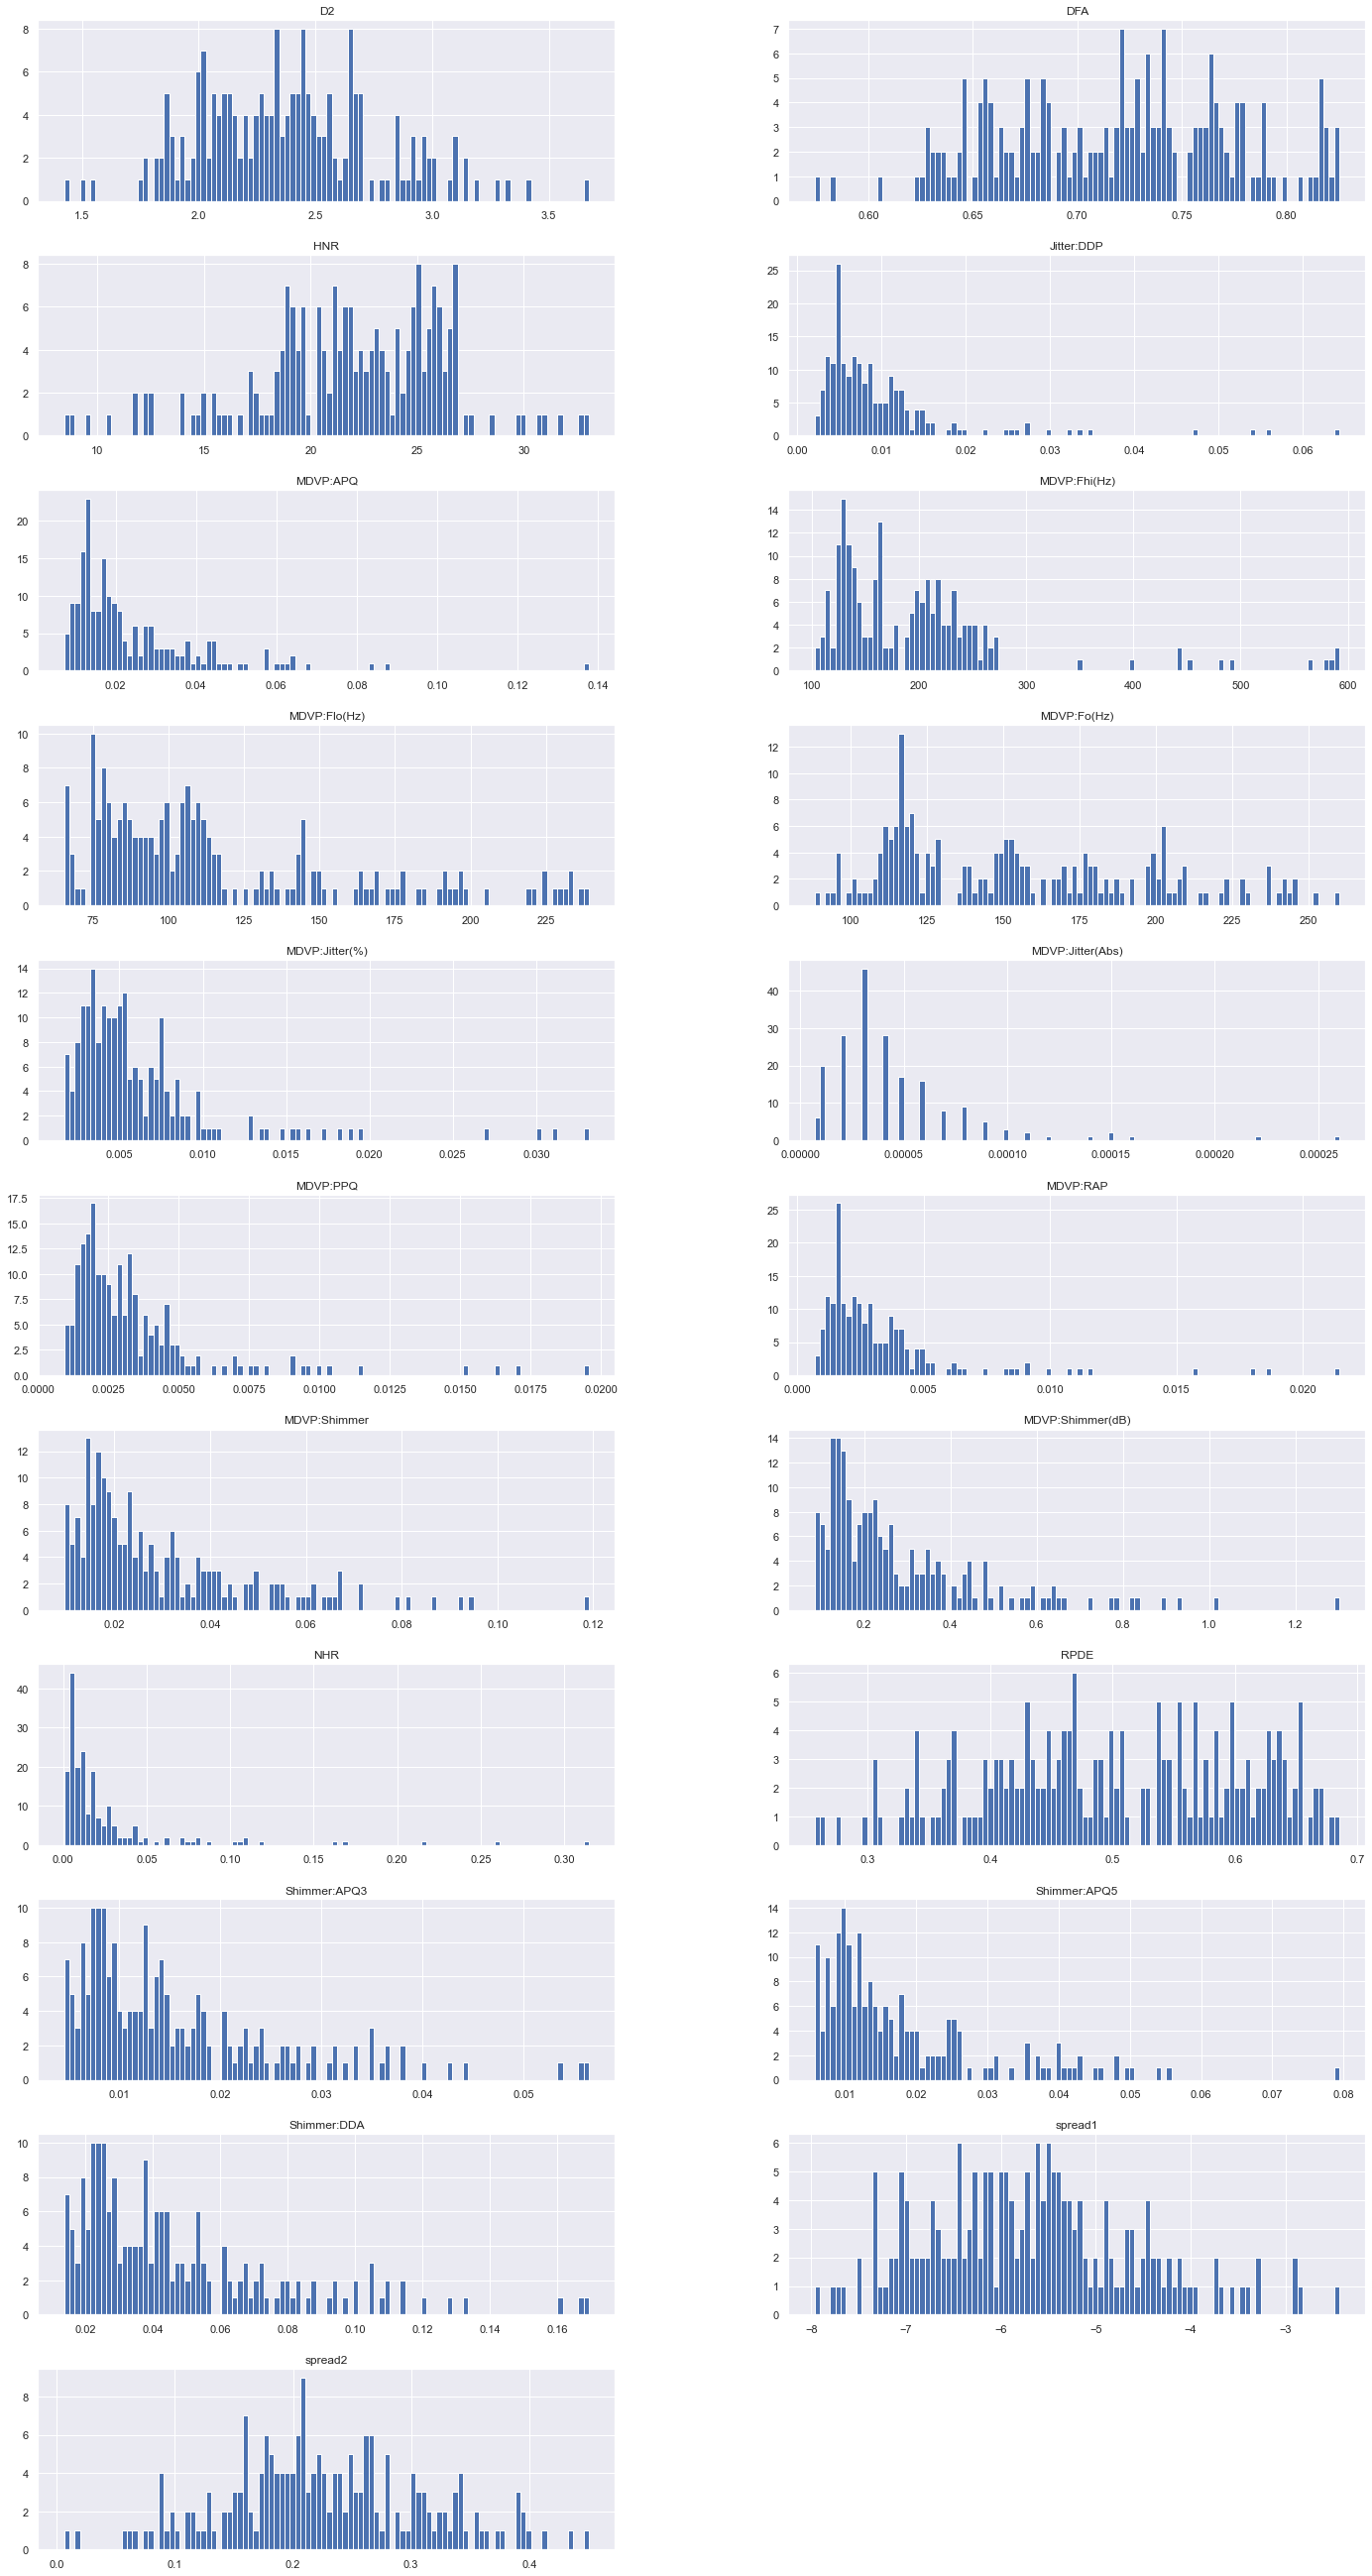

In [13]:
feat = list(X)[0:-1]
neurodat[feat].hist(stacked = False,bins=100,figsize=(24,60),layout = (14,2));


###### The distribution is skewed to either the left or the right for the majority of the features indicating some acute outlier presence clearly. On the contrary for a few features, the distributions indicate the a convincing bell shaped curve.  

In [14]:
X.drop(['name'],axis =1, inplace = True)

###### Names column dropped. 

In [15]:
X.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

###### As observed from the skewness and distribution plots, each feature seems to be skewed in varying degrees. 

In [16]:
X.tail()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
190             0.405  ...   0.02745      0.07008  0.02764  19.517  0.448439   
191             0.263  ...   0.01879      0.04812  0.01810  19.147  0.431674   
192             0.256  ...   0.01667      0.03804  0.10715  17.883  0.407567   
193             0.241  ...   0.01588      0.03794  0.07223  19.020  0.451221   
194             0.190  ...   0.01373      0.03078  0.04398  21.209  0.462803   

          DFA   spread1   spread2        D2       PPE  
190  0.657899 -6.538586  0.121952  2.657476  0.133050  
191  0.683244 -6.195325  0.129303  2.784312  0.168895  
192  0.655683 -6.787197  0.158453  2.679772  0.131728  
193  0.643956 -6.744577  0.207454  2.138608  0.123306  
194  0.664357 -5.724056  0.190667  2.555477  0.148569  

[5 rows x 22 columns]

In [17]:
neurodat.drop(['name'],axis=1,inplace=True)

In [18]:
neurodat.drop(['status'],axis=1,inplace=True)

In [19]:
neurodat = pd.concat([neurodat,y],axis=1)

###### dependant variable flown to the last. 

In [20]:
neurodat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

###### As detailed in the attached dataset information file, every feature is in some way descriptive of the wave samples of many patients' cranial region and so it's tough to expect a categorical feature [although it's very possible that such a dataset includes categorical features]. So all the features, except for the predicted, are uniformly numerical. 

In [21]:
feat = list(neurodat)[0:-1]
print(feat)

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


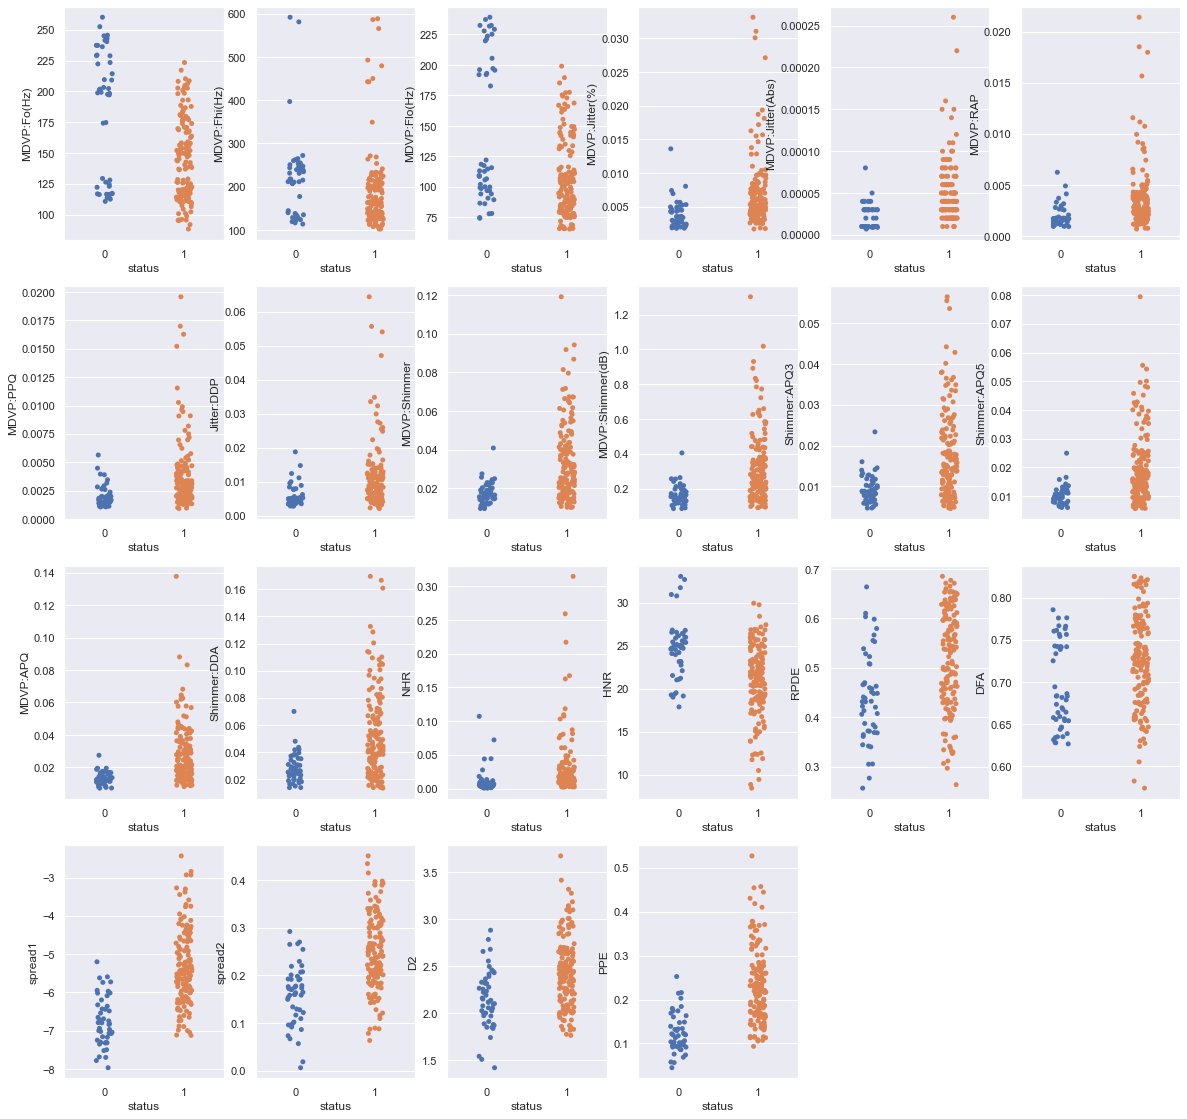

In [22]:
plt.figure(figsize=(20,30))
j=1
for i in feat: 
    plt.subplot(6,6,j)
    sns.stripplot(neurodat['status'],neurodat[i])
    j+=1

###### From the above stripplot of all the features against the dependent variables, it's possible to judge the characteristics of the presence and absence of parkinson's disease based on the density and range of the observations in the context of each feature. 

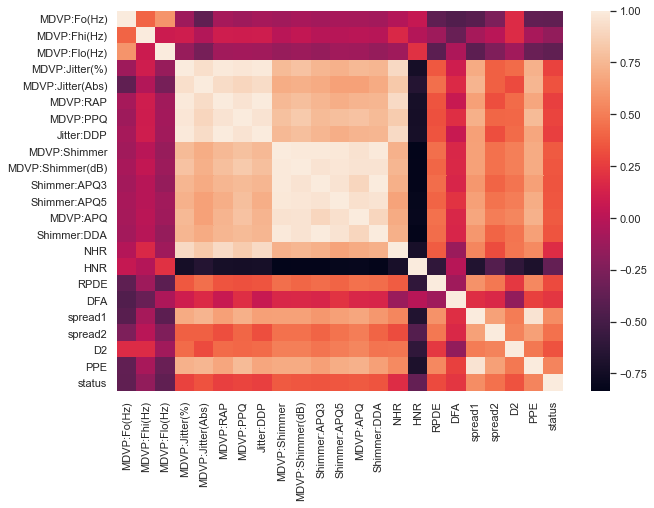

In [23]:
plt.figure(figsize=(10,7))
corr = neurodat.corr()
sns.heatmap(corr)

###### From the heatmap, a careful observation would prove that a lot of features are most likely closely linked possibly coinciding in pairs. Aside of that, two features are deliberately implied twice on two different scales namely; Jitter and Shimmer. 

###### But before proceeding to eliminate any features suspected of being extra, it is probably necessary to observe more indicators like say feature importance. 

https://medium.com/swlh/what-to-keep-and-what-to-remove-74ba1b3cb04

the above link does suggest ridding the dataset of twice implied features.

###### even from the strip plots above, similar distribution patterns can be observed betw the pairs of variations each of the features jitter and shimmer. 

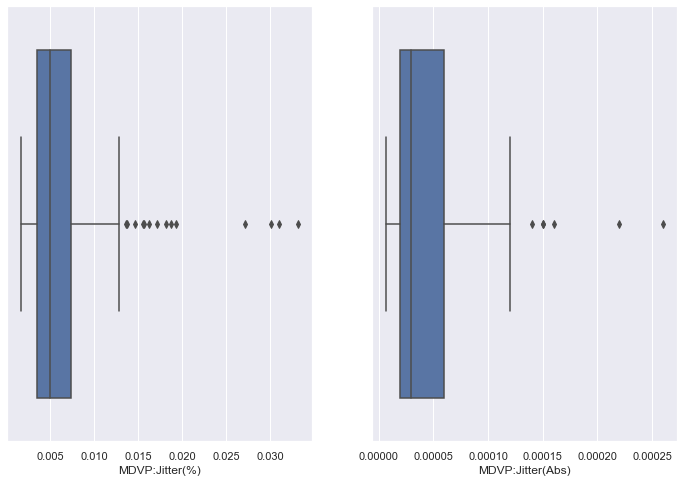

In [24]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(neurodat['MDVP:Jitter(%)'])

plt.subplot(1,2,2)
sns.boxplot(neurodat['MDVP:Jitter(Abs)'])

###### Again a boxplot visualization, indicating similarity in the distributions each of the two variations of Jitter. 

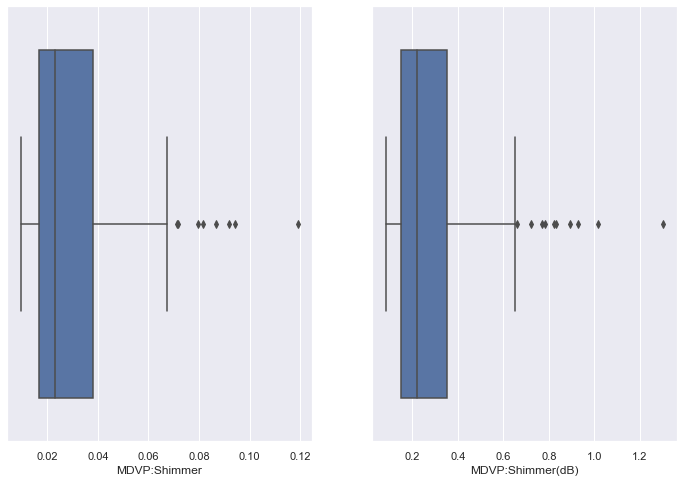

In [25]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(neurodat['MDVP:Shimmer'])

plt.subplot(1,2,2)
sns.boxplot(neurodat['MDVP:Shimmer(dB)'])

###### Another visualization of the striking similarity betw distributions of the variations of Shimmer. 

<Figure size 1080x1080 with 0 Axes>

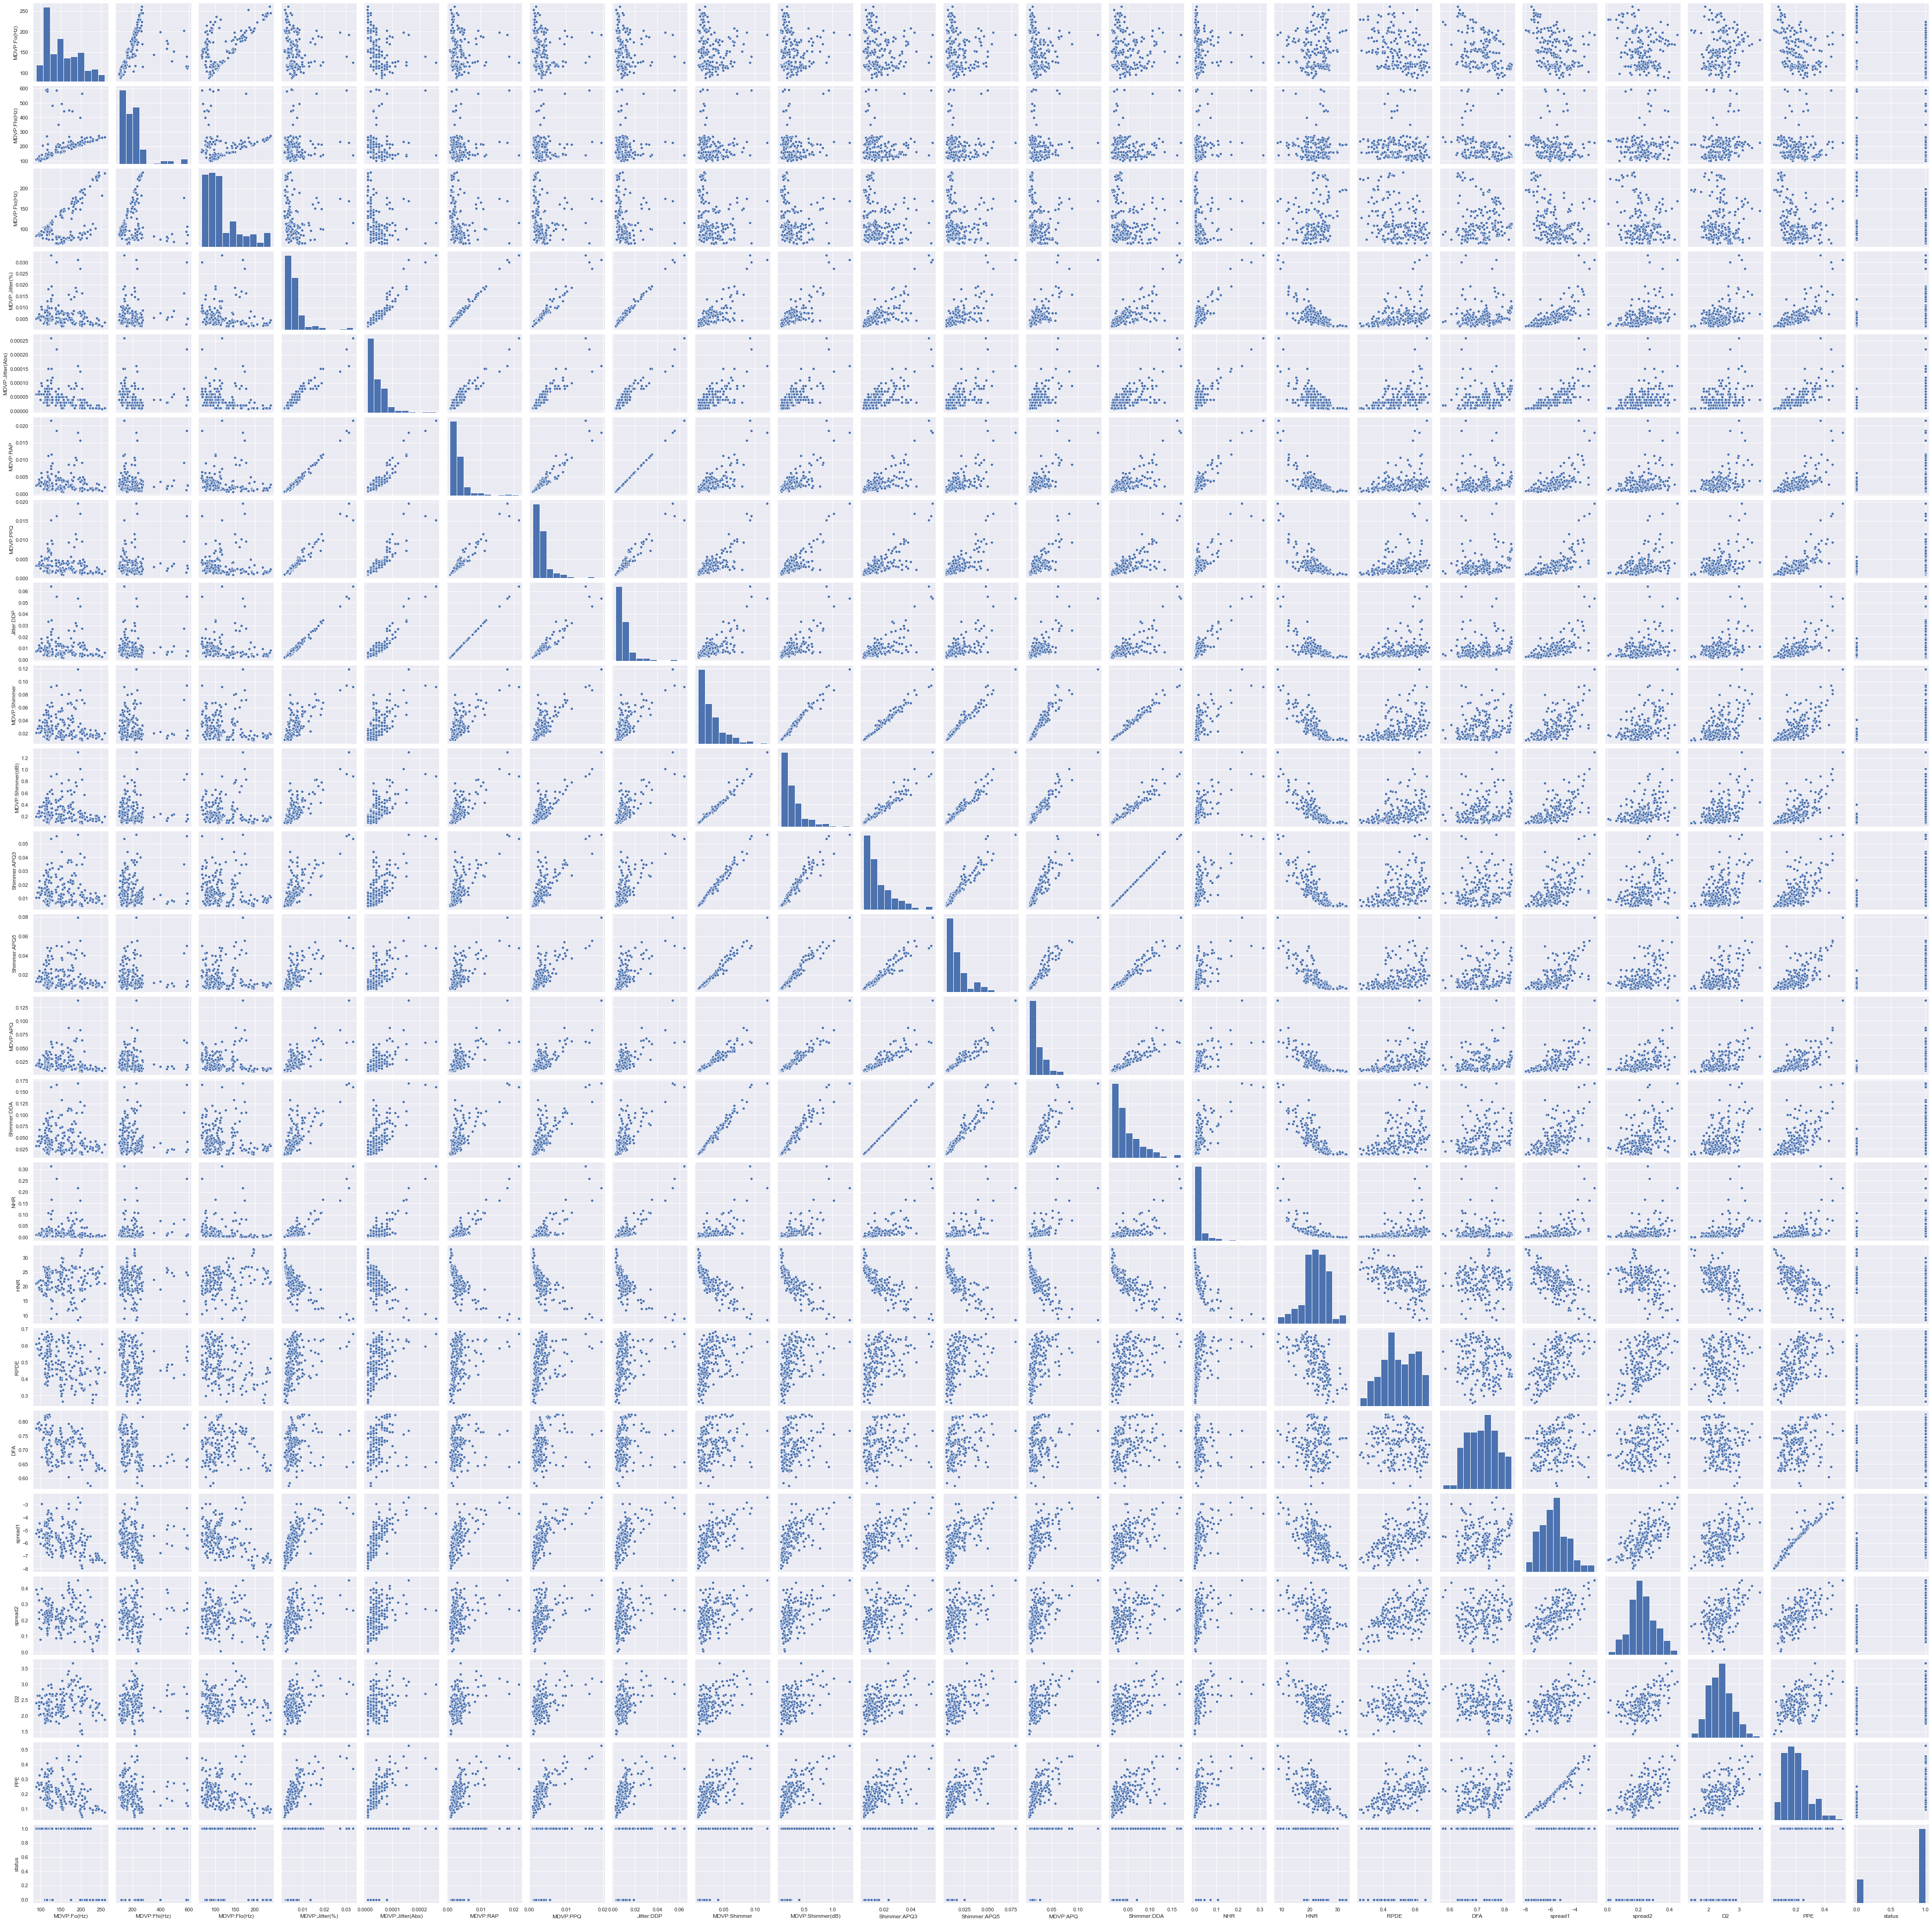

In [26]:
plt.figure(figsize=(15,15))
sns.pairplot(neurodat)

###### From the above pairplot, collinearity can be observed in a substantial lot of pairs of features, which calls for methods of either removal, reduction or combination of features. 

## TASK 3 - END

## DATA cleaning / PREPROCESSING STEPS 

In [27]:
X.isna().any().any()

False

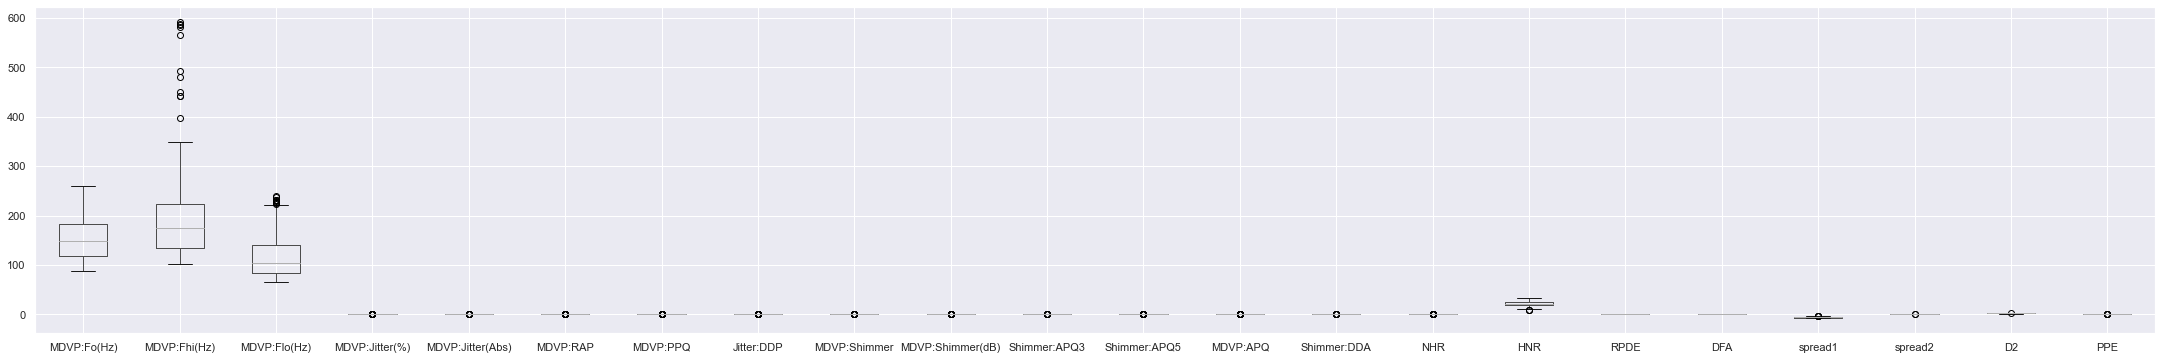

In [28]:
X.boxplot(column = feat, return_type = 'axes', figsize = (38,6) )

###### To some level, outlier presence is indicated for all the features in the above boxplot. 

In [29]:
feat_desc = X.describe()
feat_desc

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...    MDVP:APQ  Shimmer:DDA         NHR         HNR  \
count        195.000000  ...  195.000000   195.000000  195.000000  195.000000   
mean           0.282251  ...    0.024081     0.046993    0.024847   21.885974   
std            0.194877  ...    0.016947     0.030459    0.040418    4.425764   
min            0.085000  ...    0.007190     0.013640    0.000650    8.441000   
25%            0.148500  ...    0.013080     0.024735    0.005925   19.198000   
50%            0.221000  ...    0.018260     0.038360    0.011660   22.085000   
75%            0.350000  ...    0.029400     0.060795    0.025640   25.075500   
max            1.302000  ...    0.137780     0.169420    0.314820   33.047000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 22 columns]

In [30]:
outlier_list = []
j=1
for i in list(feat_desc):
    print(j)
    j+=1
    q1 = feat_desc[i]['25%']
    q3 = feat_desc[i]['75%']
    iqr = np.abs(q1 - q3)
    up_lim = q3 + 1.5*iqr
    dwn_lim = q1 - 1.5*iqr
    mx = feat_desc[i]['max']
    mn = feat_desc[i]['min']
    if ((mn<=dwn_lim)|(mx>=up_lim)):
        print('OUTLIER PRESENCE CONFIRMED')
        outlier_list.append(i)
    else: 
        print('NO OUTLIERS')



1
NO OUTLIERS
2
OUTLIER PRESENCE CONFIRMED
3
OUTLIER PRESENCE CONFIRMED
4
OUTLIER PRESENCE CONFIRMED
5
OUTLIER PRESENCE CONFIRMED
6
OUTLIER PRESENCE CONFIRMED
7
OUTLIER PRESENCE CONFIRMED
8
OUTLIER PRESENCE CONFIRMED
9
OUTLIER PRESENCE CONFIRMED
10
OUTLIER PRESENCE CONFIRMED
11
OUTLIER PRESENCE CONFIRMED
12
OUTLIER PRESENCE CONFIRMED
13
OUTLIER PRESENCE CONFIRMED
14
OUTLIER PRESENCE CONFIRMED
15
OUTLIER PRESENCE CONFIRMED
16
OUTLIER PRESENCE CONFIRMED
17
NO OUTLIERS
18
NO OUTLIERS
19
OUTLIER PRESENCE CONFIRMED
20
OUTLIER PRESENCE CONFIRMED
21
OUTLIER PRESENCE CONFIRMED
22
OUTLIER PRESENCE CONFIRMED


In [31]:
outlier_list

['MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'spread1',
 'spread2',
 'D2',
 'PPE']

###### So far a routine has been written to identify outlier presence in features and build a list of features with outliers. 

In [32]:
feat_desc[outlier_list]

MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
count    195.000000    195.000000      195.000000        195.000000   
mean     197.104918    116.324631        0.006220          0.000044   
std       91.491548     43.521413        0.004848          0.000035   
min      102.145000     65.476000        0.001680          0.000007   
25%      134.862500     84.291000        0.003460          0.000020   
50%      175.829000    104.315000        0.004940          0.000030   
75%      224.205500    140.018500        0.007365          0.000060   
max      592.030000    239.170000        0.033160          0.000260   

         MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
count  195.000000  195.000000  195.000000    195.000000        195.000000   
mean     0.003306    0.003446    0.009920      0.029709          0.282251   
std      0.002968    0.002759    0.008903      0.018857          0.194877   
min      0.000680    0.000920    0.002040      0.009540          0.085000   
25%      0.001660    0.001860    0.004985      0.016505          0.148500   
50%      0.002500    0.002690    0.007490      0.022970          0.221000   
75%      0.003835    0.003955    0.011505      0.037885          0.350000   
max      0.021440    0.019580    0.064330      0.119080          1.302000   

       Shimmer:APQ3  Shimmer:APQ5    MDVP:APQ  Shimmer:DDA         NHR  \
count    195.000000    195.000000  195.000000   195.000000  195.000000   
mean       0.015664      0.017878    0.024081     0.046993    0.024847   
std        0.010153      0.012024    0.016947     0.030459    0.040418   
min        0.004550      0.005700    0.007190     0.013640    0.000650   
25%        0.008245      0.009580    0.013080     0.024735    0.005925   
50%        0.012790      0.013470    0.018260     0.038360    0.011660   
75%        0.020265      0.022380    0.029400     0.060795    0.025640   
max        0.056470      0.079400    0.137780     0.169420    0.314820   

              HNR     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  
mean    21.885974   -5.684397    0.226510    2.381826    0.206552  
std      4.425764    1.090208    0.083406    0.382799    0.090119  
min      8.441000   -7.964984    0.006274    1.423287    0.044539  
25%     19.198000   -6.450096    0.174351    2.099125    0.137451  
50%     22.085000   -5.720868    0.218885    2.361532    0.194052  
75%     25.075500   -5.046192    0.279234    2.636456    0.252980  
max     33.047000   -2.434031    0.450493    3.671155    0.527367

###### Although the above displays the spread of the features listed as having outliers, the standard deviatons suggest a radically different story for most of the features. 

In [33]:
for j in np.arange(0,10):
    for i in outlier_list: 
         if (feat_desc[i]['std'] <= 4):
                outlier_list.remove(i)

In [34]:
outlier_list

['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR']

###### Therefore, all features with standard deviations less than 4 are rejected from the list and finally we are left with three features. 

In [35]:
def remove_outliers():
    for i in list(outlier_list):
            q1 = feat_desc[i]['25%']
            q3 = feat_desc[i]['75%']
            iqr = np.abs(q1 - q3)
            up_lim = q3 + 1.5*iqr
            dwn_lim = q1 - 1.5*iqr
            mx = feat_desc[i]['max']
            mn = feat_desc[i]['min']
            neurodat[i] = neurodat[i][~((neurodat[i]<dwn_lim)|(neurodat[i]>up_lim))]
            print(f'removed outliers for {i}!')
            print('')
            print('')
     

###### A function is written to scrape outliers off the select features. 

(array([ 4.,  6.,  9., 11., 41., 44., 41., 31.,  3.,  5.]),
 array([ 8.441 , 10.9016, 13.3622, 15.8228, 18.2834, 20.744 , 23.2046,
        25.6652, 28.1258, 30.5864, 33.047 ]),
 <a list of 10 Patch objects>)

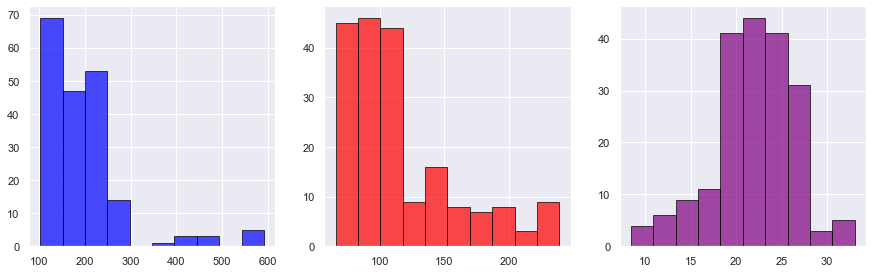

In [36]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.hist(neurodat['MDVP:Fhi(Hz)'],color='blue',edgecolor='black',alpha=0.7)

plt.subplot(3,3,2)
plt.hist(neurodat['MDVP:Flo(Hz)'],color='red',edgecolor='black',alpha=0.7)

plt.subplot(3,3,3)
plt.hist(neurodat['HNR'],color='purple',edgecolor='black',alpha=0.7)







###### Above is a visualization of the select features in order namely; 'MDVP:Fhi(Hz)' , 'MDVP:Flo(Hz)' and 'HNR' before the removal of outliers. 

In [37]:
remove_outliers()

removed outliers for MDVP:Fhi(Hz)!


removed outliers for MDVP:Flo(Hz)!


removed outliers for HNR!




C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 7.,  5.,  9., 30., 36., 35., 44., 19.,  3.,  4.]),
 array([10.489 , 12.7448, 15.0006, 17.2564, 19.5122, 21.768 , 24.0238,
        26.2796, 28.5354, 30.7912, 33.047 ]),
 <a list of 10 Patch objects>)

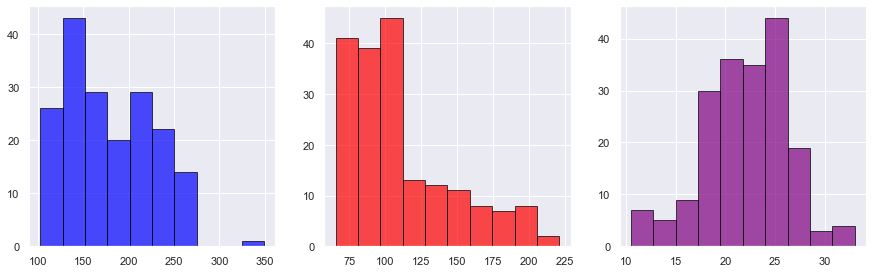

In [38]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.hist(neurodat['MDVP:Fhi(Hz)'],color='blue',edgecolor='black',alpha=0.7)

plt.subplot(3,3,2)
plt.hist(neurodat['MDVP:Flo(Hz)'],color='red',edgecolor='black',alpha=0.7)

plt.subplot(3,3,3)
plt.hist(neurodat['HNR'],color='purple',edgecolor='black',alpha=0.7)



###### After removing outliers it can observed that  for 'MDVP:Fhi(Hz)'  the distribution has drastically changed and for 'MDVP:Flo(Hz)' and 'HNR' , the same has changed slightly across both horizontal and vertical scales. 

In [39]:
neurodat.isna().any()


MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)         True
MDVP:Flo(Hz)         True
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                  True
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
status              False
dtype: bool

  ###### The outlier removal has left a lot of null values in the three columns which will have to be corrected. 

In [40]:
missing_val = pd.DataFrame(neurodat['MDVP:Fhi(Hz)'].isnull())
neurodat[missing_val['MDVP:Fhi(Hz)']==True]

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
73       112.014           NaN       107.024         0.00533   
102      139.224           NaN        66.157         0.03011   
115      151.872           NaN        69.085         0.00856   
116      158.219           NaN        71.948         0.00476   
117      170.756           NaN        79.032         0.00555   
118      178.285           NaN        82.063         0.00462   
120      128.940           NaN        88.251         0.00581   
149      202.632           NaN       177.258         0.01627   
186      116.556           NaN        86.228         0.00496   
187      116.342           NaN        94.246         0.00267   
193      198.764           NaN        74.904         0.00740   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
73            0.00005   0.00268   0.00329     0.00805       0.02448   
102           0.00022   0.01854   0.01628     0.05563       0.09419   
115           0.00006   0.00404   0.00385     0.01211       0.01843   
116           0.00003   0.00214   0.00207     0.00642       0.01458   
117           0.00003   0.00244   0.00261     0.00731       0.01725   
118           0.00003   0.00157   0.00194     0.00472       0.01279   
120           0.00005   0.00241   0.00314     0.00723       0.02008   
149           0.00008   0.00919   0.00963     0.02756       0.07170   
186           0.00004   0.00254   0.00263     0.00762       0.01660   
187           0.00002   0.00115   0.00148     0.00345       0.01300   
193           0.00004   0.00370   0.00390     0.01109       0.02296   

     MDVP:Shimmer(dB)  ...  Shimmer:DDA      NHR     HNR      RPDE       DFA  \
73              0.226  ...      0.04120  0.00623  24.178  0.509127  0.789532   
102             0.930  ...      0.16654  0.25930  10.489  0.596362  0.641418   
115             0.235  ...      0.02389  0.06051  23.693  0.407701  0.662668   
116             0.148  ...      0.01818  0.01554  26.356  0.450798  0.653823   
117             0.175  ...      0.02270  0.01802  25.690  0.486738  0.676023   
118             0.129  ...      0.01851  0.00856  25.020  0.470422  0.655239   
120             0.221  ...      0.02548  0.02350  24.743  0.487756  0.684130   
149             0.833  ...      0.10546  0.07889  14.989  0.427627  0.775708   
186             0.154  ...      0.02460  0.01397  23.958  0.566424  0.667654   
187             0.117  ...      0.01892  0.00680  25.023  0.528485  0.663884   
193             0.241  ...      0.03794  0.07223  19.020  0.451221  0.643956   

      spread1   spread2        D2       PPE  status  
73  -5.389129  0.306636  1.928708  0.225461       1  
102 -3.269487  0.270641  2.690917  0.444774       1  
115 -4.673241  0.261549  2.702355  0.274407       1  
116 -6.051233  0.273280  2.640798  0.170106       1  
117 -4.597834  0.372114  2.975889  0.282780       1  
118 -4.913137  0.393056  2.816781  0.251972       1  
120 -6.186128  0.279933  2.686240  0.152428       1  
149 -4.892495  0.262281  2.910213  0.270173       1  
186 -6.431119  0.153310  2.161936  0.120605       0  
187 -6.359018  0.116636  2.152083  0.138868       0  
193 -6.744577  0.207454  2.138608  0.123306       0  

[11 rows x 23 columns]

In [41]:
print(missing_val.shape)

(195, 1)


In [42]:
missing_val = pd.DataFrame(neurodat['MDVP:Flo(Hz)'].isnull())
neurodat[missing_val['MDVP:Flo(Hz)']==True]

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
42       237.226       247.326           NaN         0.00298   
43       241.404       248.834           NaN         0.00281   
44       243.439       250.912           NaN         0.00210   
45       242.852       255.034           NaN         0.00225   
46       245.510       262.090           NaN         0.00235   
63       228.832       234.619           NaN         0.00296   
166      237.323       243.709           NaN         0.00303   
167      260.105       264.919           NaN         0.00339   
170      244.990       272.210           NaN         0.00451   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
42           0.000010   0.00169   0.00182     0.00507       0.01752   
43           0.000010   0.00157   0.00173     0.00470       0.01760   
44           0.000009   0.00109   0.00137     0.00327       0.01419   
45           0.000009   0.00117   0.00139     0.00350       0.01494   
46           0.000010   0.00127   0.00148     0.00380       0.01608   
63           0.000010   0.00175   0.00155     0.00526       0.01644   
166          0.000010   0.00173   0.00159     0.00519       0.01242   
167          0.000010   0.00205   0.00186     0.00616       0.02030   
170          0.000020   0.00279   0.00237     0.00837       0.01897   

     MDVP:Shimmer(dB)  ...  Shimmer:DDA      NHR     HNR      RPDE       DFA  \
42              0.164  ...      0.03104  0.00740  22.736  0.305062  0.654172   
43              0.154  ...      0.03017  0.00675  23.145  0.457702  0.634267   
44              0.126  ...      0.02330  0.00454  25.368  0.438296  0.635285   
45              0.134  ...      0.02542  0.00476  25.032  0.431285  0.638928   
46              0.141  ...      0.02719  0.00476  24.602  0.467489  0.631653   
63              0.145  ...      0.02647  0.00351  25.964  0.256570  0.683296   
166             0.116  ...      0.02089  0.00533  24.679  0.384868  0.626710   
167             0.197  ...      0.03557  0.00910  21.083  0.440988  0.628058   
170             0.181  ...      0.03253  0.01049  21.528  0.522812  0.646818   

      spread1   spread2        D2       PPE  status  
42  -7.310550  0.098648  2.416838  0.095032       0  
43  -6.793547  0.158266  2.256699  0.117399       0  
44  -7.057869  0.091608  2.330716  0.091470       0  
45  -6.995820  0.102083  2.365800  0.102706       0  
46  -7.156076  0.127642  2.392122  0.097336       0  
63  -7.245620  0.018689  2.498224  0.093534       0  
166 -7.018057  0.176316  1.852402  0.091604       0  
167 -7.517934  0.160414  1.881767  0.075587       0  
170 -7.304500  0.171088  2.095237  0.096220       0  

[9 rows x 23 columns]

In [43]:
print(missing_val.shape)

(195, 1)


In [44]:
missing_val = pd.DataFrame(neurodat['HNR'].isnull())
neurodat[missing_val['HNR']==True]

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
100      125.641       141.068       116.346         0.03316   
151      192.818       224.429       168.793         0.03107   
152      198.116       233.099       174.478         0.02714   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
100           0.00026   0.02144   0.01522     0.06433       0.09178   
151           0.00016   0.01800   0.01958     0.05401       0.11908   
152           0.00014   0.01568   0.01699     0.04705       0.08684   

     MDVP:Shimmer(dB)  ...  Shimmer:DDA      NHR  HNR      RPDE       DFA  \
100             0.891  ...      0.16074  0.31482  NaN  0.671299  0.656846   
151             1.302  ...      0.16942  0.21713  NaN  0.625866  0.768320   
152             1.018  ...      0.12851  0.16265  NaN  0.584164  0.754449   

      spread1   spread2        D2       PPE  status  
100 -3.700544  0.260481  2.991063  0.370961       1  
151 -2.434031  0.450493  3.079221  0.527367       1  
152 -2.839756  0.356224  3.184027  0.454721       1  

[3 rows x 23 columns]

In [45]:
print(missing_val.shape)

(195, 1)


###### The exact rows of outliers for each of the columns have been located. 

In [46]:
median_filler = lambda x:x.fillna(x.median())
neurodat = neurodat.apply(median_filler,axis=0)

In [47]:
neurodat.isna().any().any()

False

In [48]:
neurodat.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    177.616079    110.343892        0.006220   
std      41.390065     46.783061     35.453489        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    165.363500    101.447000        0.004940   
75%     182.769000    213.582000    123.845000        0.007365   
max     260.105000    349.259000    221.156000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR        RPDE  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   22.090782    0.498536   
std            0.194877  ...     0.030459    0.040418    4.116345    0.103942   
min            0.085000  ...     0.013640    0.000650   10.489000    0.256570   
25%            0.148500  ...     0.024735    0.005925   19.378000    0.421306   
50%            0.221000  ...     0.038360    0.011660   22.231500    0.495954   
75%            0.350000  ...     0.060795    0.025640   25.075500    0.587562   
max            1.302000  ...     0.169420    0.314820   33.047000    0.685151   

              DFA     spread1     spread2          D2         PPE      status  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.718099   -5.684397    0.226510    2.381826    0.206552    0.753846  
std      0.055336    1.090208    0.083406    0.382799    0.090119    0.431878  
min      0.574282   -7.964984    0.006274    1.423287    0.044539    0.000000  
25%      0.674758   -6.450096    0.174351    2.099125    0.137451    1.000000  
50%      0.722254   -5.720868    0.218885    2.361532    0.194052    1.000000  
75%      0.761881   -5.046192    0.279234    2.636456    0.252980    1.000000  
max      0.825288   -2.434031    0.450493    3.671155    0.527367    1.000000  

[8 rows x 23 columns]

## TASK 4 AND 5

In [49]:
X = neurodat[feat]

In [50]:
y = neurodat['status']

In [51]:
X_scaled = X.apply(zscore)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=45)

In [53]:
x_train.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   136.000000    136.000000    136.000000      136.000000   
mean     -0.049793     -0.003785     -0.060838        0.030863   
std       0.935575      0.999709      0.897580        1.019181   
min      -1.509663     -1.617366     -1.268800       -0.938949   
25%      -0.854297     -0.914008     -0.704904       -0.523289   
50%      -0.163130     -0.262576     -0.251591       -0.254454   
75%       0.581562      0.729030      0.177854        0.234101   
max       2.379295      3.678356      2.507634        5.570985   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        136.000000  136.000000  136.000000  136.000000    136.000000   
mean           0.035477    0.018948    0.014656    0.018967      0.064578   
std            1.008037    1.024434    1.012036    1.024474      1.007276   
min           -1.064103   -0.887254   -0.918044   -0.887333     -1.070213   
25%           -0.473878   -0.546056   -0.554658   -0.546417     -0.668268   
50%           -0.113985   -0.272422   -0.222159   -0.273065     -0.227244   
75%            0.461845    0.196304    0.188467    0.195941      0.501016   
max            6.220139    6.125892    5.862742    6.126923      4.751617   

       MDVP:Shimmer(dB)  ...    MDVP:APQ  Shimmer:DDA         NHR         HNR  \
count        136.000000  ...  136.000000   136.000000  136.000000  136.000000   
mean           0.056736  ...    0.071144     0.062071    0.044304   -0.078857   
std            1.013366  ...    1.048243     0.993590    1.029258    0.965463   
min           -1.014787  ...   -0.995164    -1.097815   -0.600205   -2.490341   
25%           -0.659807  ...   -0.621863    -0.675839   -0.462538   -0.738297   
50%           -0.222512  ...   -0.252702    -0.187868   -0.277246   -0.061811   
75%            0.421854  ...    0.406047     0.491835    0.058674    0.682993   
max            5.246243  ...    6.726438     4.029746    7.192738    2.668489   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  136.000000  136.000000  136.000000  136.000000  136.000000  136.000000  
mean     0.156417   -0.059169    0.073364    0.063444    0.023189    0.055662  
std      1.014160    0.994941    0.988653    1.010326    1.022543    0.984318  
min     -2.333888   -2.605676   -2.097268   -2.647338   -2.510472   -1.802384  
25%     -0.521349   -0.783491   -0.622209   -0.592224   -0.769918   -0.665049  
50%      0.335023    0.019096    0.053957   -0.009861    0.014423    0.013037  
75%      1.039357    0.653479    0.578306    0.769262    0.690381    0.539317  
max      1.800007    1.942048    2.989093    2.692370    3.376831    3.569059  

[8 rows x 22 columns]

In [54]:
x_train

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
164    -1.258499     -0.745475     -0.691182        0.589273   
185    -0.919069     -0.006967     -0.377827       -0.637027   
99     -0.671368     -0.768491     -0.299015        2.717202   
109     0.939869      0.670423     -0.849683        0.297691   
155    -0.880700     -1.077237     -0.415409        0.051604   
..           ...           ...           ...             ...   
95      0.077957     -0.307505      1.110248       -0.523289   
32      1.069532      0.805498      2.340338       -0.847958   
124     0.048696      0.374835     -0.863172        0.148798   
131    -0.822905     -1.121020     -0.157537       -0.444707   
158    -0.680282     -0.500013     -0.361991        0.729894   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
164          1.325589  0.548481  0.422851    0.549525     -0.083426   
185         -0.401899 -0.664293 -0.554658   -0.663246     -0.748019   
99           3.053077  2.798364  2.345164    2.797150      2.000736   
109         -0.113985  0.403219  0.161213    0.404263      0.038859   
155          0.173930  0.085668 -0.162201    0.084461      0.061721   
..                ...       ...       ...         ...           ...   
95          -0.689814 -0.437954 -0.536488   -0.439159      0.160080   
32          -0.977729 -0.735235 -0.761788   -0.735314     -0.908053   
124         -0.113985  0.244443  0.183016    0.244362     -0.333845   
131         -0.401899 -0.360255 -0.507418   -0.361461     -0.773539   
158          1.037674  0.886301  0.397414    0.885092     -0.063223   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
164         -0.052739  ... -0.198275     0.012093  0.346596 -0.887477   
185         -0.752411  ... -0.424267    -0.888143 -0.433516  0.513476   
99           1.938238  ...  1.996572     2.018944  3.536998 -2.351756   
109         -0.037305  ... -0.191767     0.201685 -0.381426 -0.038186   
155         -0.032161  ... -0.003638     0.091419  0.036288  0.082863   
..                ...  ...       ...          ...       ...       ...   
95           0.003852  ...  0.096343     0.243488 -0.363815 -0.096884   
32          -0.881027  ... -0.862054    -0.915134 -0.586811  2.115122   
124         -0.299682  ... -0.407111    -0.273942 -0.115270 -0.705051   
131         -0.742121  ... -0.649668    -0.834491 -0.364559  0.956267   
158         -0.083607  ... -0.148580    -0.065917  0.333202 -0.135609   

         RPDE       DFA   spread1   spread2        D2       PPE  
164  1.667159 -0.788804  2.533562  2.046308  0.467754  1.787574  
185  0.964356 -1.155349  0.084433 -1.113013 -0.846397  0.086712  
99   1.350467 -0.781720  1.769389  0.196542  0.662117  1.912730  
109 -0.009467  0.406567 -0.147785  0.627090  0.594325 -0.232330  
155  1.251648 -1.197129  1.931817 -0.223536  0.151306 -0.003289  
..        ...       ...       ...       ...       ...       ...  
95  -0.494339 -0.225407 -0.517450 -0.552728 -0.098157 -0.463195  
32  -0.314344  0.373302 -1.272322 -0.617001 -2.277407 -1.226323  
124  1.158694  0.187013 -0.238911 -0.999516 -1.184106 -0.273270  
131 -0.288542  0.308675 -0.393845 -0.114162  0.382163 -0.399594  
158  1.316418 -1.644426  0.564922  0.644063  1.336962  0.480057  

[136 rows x 22 columns]

In [55]:
print(f'x_train samples number and percentage: {len(x_train)}, {round((len(x_train)/len(X))*100,3)}%')
print(f'x_test samples number and percentage: {len(x_test)}, {round((len(x_test)/len(X))*100,3)}%')
print(f'y_train samples number and percentage: {len(y_train)}, {round((len(y_train)/len(y))*100,3)}%')
print(f'y_test samples number and percentage: {len(y_test)}, {round((len(y_test)/len(y))*100,3)}%')


x_train samples number and percentage: 136, 69.744%
x_test samples number and percentage: 59, 30.256%
y_train samples number and percentage: 136, 69.744%
y_test samples number and percentage: 59, 30.256%


In [56]:
print(f'number and percentage of pd cases: {len(y[y==1])}, {round((len(y[y==1])/len(y))*100,3)}')

number and percentage of pd cases: 147, 75.385


In [57]:
print(f'number and percentage of healthy cases: {len(y[y==0])}, {round((len(y[y==0])/len(y))*100,3)}')

number and percentage of healthy cases: 48, 24.615


## TASK 6

In [58]:
def fit_n_print(model,x_train,x_test,y_train,y_test):
    from sklearn import metrics 
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    score = round(model.score(x_test,y_test),3)
    
    tn,fp,fn,tp = metrics.confusion_matrix(y_test,pred).ravel()
    
    recall = round(tp/(tp+fn),3)
    precision = round(tp/(tp+fp),3)
    specificity = round(tn/(tn+fp),3)
    f1_score = round(2*precision*recall/(precision+recall),3)
    
    return score,recall,precision,specificity,f1_score
    

### ITERATION 1

In [59]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr,x_train,x_test,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,x_train,x_test,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,x_train,x_test,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn,x_train,x_test,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = fit_n_print(dTree,x_train,x_test,y_train,y_test)



In [60]:
result1 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [61]:
result1

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression     0.831   0.900      0.857        0.684     0.878
1          Naive Bayes     0.661   0.525      0.955        0.947     0.678
2                  SVM     0.797   1.000      0.769        0.368     0.869
3                  KNN     0.847   0.950      0.844        0.632     0.894
4        Decision Tree     0.797   0.825      0.868        0.737     0.846

 ###### Here, SVM seems to have the highest recall score with one of the highest F1 scores, while KNN has the highest F1 score with second highest recall score. Since, avoiding type 2 errors is in our best interests, our essential parameter will be recall.  

### ITERATION 2

In [62]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr,x_train,x_test,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,x_train,x_test,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,x_train,x_test,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn,x_train,x_test,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = fit_n_print(dTree,x_train,x_test,y_train,y_test)


In [63]:
result2 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [64]:
result2

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression     0.831   0.900      0.857        0.684     0.878
1          Naive Bayes     0.661   0.525      0.955        0.947     0.678
2                  SVM     0.797   1.000      0.769        0.368     0.869
3                  KNN     0.847   0.950      0.844        0.632     0.894
4        Decision Tree     0.746   0.850      0.791        0.526     0.819

###### Here, there has been a  adjustment in the tree depth of the decision tree to 2, since any deeper gets the model overfitting, in an attempt to check if Decision Tree could outperform any more models but unfortunately it barely outperforms itself. 

### ITERATION 3

In [65]:
x_train2 = x_train.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
x_test2 = x_test.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])

In [66]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr,x_train2,x_test2,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,x_train2,x_test2,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,x_train2,x_test2,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn,x_train2,x_test2,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = fit_n_print(dTree,x_train2,x_test2,y_train,y_test)


In [67]:
result3 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [68]:
result3

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression     0.831    0.90      0.857        0.684     0.878
1          Naive Bayes     0.678    0.55      0.957        0.947     0.699
2                  SVM     0.814    1.00      0.784        0.421     0.879
3                  KNN     0.864    0.95      0.864        0.684     0.905
4        Decision Tree     0.746    0.85      0.791        0.526     0.819

###### After dropping the two columns suspected of being second implications of their respective features, there seems to be an overal hike in the score figures of most of the models; KNN has gone up by several points in both its recall and F1 score, while SVM maintains closely behind KNN with a still better recall score. 

### ITERATION 4

In [69]:
extra_samples = y_train[y_train==1].sample(700,replace=True,random_state=1).index
y_train = y_train.append(y_train.loc[extra_samples])

extra_samples = x_train.loc[extra_samples]
x_train = x_train.append(extra_samples)

In [70]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr,x_train,x_test,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,x_train,x_test,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,x_train,x_test,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn,x_train,x_test,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = fit_n_print(dTree,x_train,x_test,y_train,y_test)

In [71]:
result4 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [72]:
result4

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression     0.831   0.975      0.812        0.526     0.886
1          Naive Bayes     0.678   0.550      0.957        0.947     0.699
2                  SVM     0.712   1.000      0.702        0.105     0.825
3                  KNN     0.780   0.975      0.765        0.368     0.857
4        Decision Tree     0.780   0.800      0.865        0.737     0.831

###### The recall seems to have improved a lot with a proportionate dip in the F1 score with a little bit of upsampling in two models namely, Logistic Refression and KNN. SVM still leads the board with 100% recall but with a major dip in the F1 score. 

### ITERATION 5

In [73]:
x_train2 = x_train.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
x_test2 = x_test.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])

In [74]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr,x_train2,x_test2,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,x_train2,x_test2,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,x_train2,x_test2,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn,x_train2,x_test2,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = fit_n_print(dTree,x_train2,x_test2,y_train,y_test)


In [75]:
result4a = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [76]:
result4a

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression     0.831   0.975      0.812        0.526     0.886
1          Naive Bayes     0.695   0.575      0.958        0.947     0.719
2                  SVM     0.746   1.000      0.727        0.211     0.842
3                  KNN     0.780   0.975      0.765        0.368     0.857
4        Decision Tree     0.814   0.950      0.809        0.526     0.874

###### Upsampling along with removal of the repetitive features seems to have imroved SVM, Decision Tree and Naive Bayes. 

In [77]:
neurodat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

### ITERATION 6

In [78]:
x_train2['custom_1'] = x_train2['MDVP:Fhi(Hz)'] - x_train2['MDVP:Flo(Hz)']
x_train2.drop(columns = ['MDVP:Flo(Hz)'],inplace = True)
x_test2['custom_1'] = x_test2['MDVP:Fhi(Hz)'] - x_test2['MDVP:Flo(Hz)']
x_test2.drop(columns = ['MDVP:Flo(Hz)'],inplace = True)

In [79]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr,x_train2,x_test2,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,x_train2,x_test2,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,x_train2,x_test2,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn,x_train2,x_test2,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = fit_n_print(dTree,x_train2,x_test2,y_train,y_test)

In [80]:
result5 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [81]:
result5

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression     0.831   0.975      0.812        0.526     0.886
1          Naive Bayes     0.695   0.575      0.958        0.947     0.719
2                  SVM     0.763   1.000      0.741        0.263     0.851
3                  KNN     0.780   0.975      0.765        0.368     0.857
4        Decision Tree     0.797   0.825      0.868        0.737     0.846

###### After an attempt to combine two features, F1_score for SVM has improved substantially and dropped substantially for Decision Tree.

### ITERATION 7

In [82]:
x_train2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)
x_test2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)

In [83]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr,x_train2,x_test2,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,x_train2,x_test2,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,x_train2,x_test2,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn,x_train2,x_test2,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = fit_n_print(dTree,x_train2,x_test2,y_train,y_test)

In [84]:
result6 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [85]:
result6

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression     0.831   0.975      0.812        0.526     0.886
1          Naive Bayes     0.678   0.575      0.920        0.895     0.708
2                  SVM     0.780   1.000      0.755        0.316     0.860
3                  KNN     0.780   0.975      0.765        0.368     0.857
4        Decision Tree     0.814   0.850      0.872        0.737     0.861

##### Dropping the features 'Jitter:DDP','Shimmer:DDA' and 'Shimmer:APQ3' doesn't seem to make have any impact on the performance. 

In [86]:
result5

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression     0.831   0.975      0.812        0.526     0.886
1          Naive Bayes     0.695   0.575      0.958        0.947     0.719
2                  SVM     0.763   1.000      0.741        0.263     0.851
3                  KNN     0.780   0.975      0.765        0.368     0.857
4        Decision Tree     0.797   0.825      0.868        0.737     0.846

###### No changes made after those made for the 3rd result, has benefitted the best performing model till this point, which is SVM. Subsequently other models did improve with further sets of changes namely; Logistic Regression and KNN. 

###### The only majorly benefitting set of changes was where second implications of Jitter and Shimmer were dropped which considerably improved the F1 score for SVM. Therefore SVM could be the best fitting model for the given problem statement. 

In [87]:
x_train

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
164    -1.258499     -0.745475     -0.691182        0.589273   
185    -0.919069     -0.006967     -0.377827       -0.637027   
99     -0.671368     -0.768491     -0.299015        2.717202   
109     0.939869      0.670423     -0.849683        0.297691   
155    -0.880700     -1.077237     -0.415409        0.051604   
..           ...           ...           ...             ...   
19      0.052717      0.252490      0.918434        0.301827   
7      -1.135957     -1.366739     -0.170488       -0.686658   
91     -0.055073     -0.306048      1.042973       -0.419891   
11     -1.509663     -1.323214     -0.680153       -0.169668   
98     -0.688833     -0.794186     -0.399799        1.563281   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
164          1.325589  0.548481  0.422851    0.549525     -0.083426   
185         -0.401899 -0.664293 -0.554658   -0.663246     -0.748019   
99           3.053077  2.798364  2.345164    2.797150      2.000736   
109         -0.113985  0.403219  0.161213    0.404263      0.038859   
155          0.173930  0.085668 -0.162201    0.084461      0.061721   
..                ...       ...       ...         ...           ...   
19           0.173930  0.139719  0.197552    0.139638      0.544481   
7           -0.401899 -0.630511 -0.590996   -0.631716     -0.746424   
91          -0.401899 -0.360255 -0.427473   -0.360335      2.652036   
11           0.461845 -0.167697 -0.031382   -0.166652     -0.116390   
98           1.901418  1.673422  1.127820    1.673338      0.913462   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
164         -0.052739  ... -0.198275     0.012093  0.346596 -0.887477   
185         -0.752411  ... -0.424267    -0.888143 -0.433516  0.513476   
99           1.938238  ...  1.996572     2.018944  3.536998 -2.351756   
109         -0.037305  ... -0.191767     0.201685 -0.381426 -0.038186   
155         -0.032161  ... -0.003638     0.091419  0.036288  0.082863   
..                ...  ...       ...          ...       ...       ...   
19           0.338254  ...  1.125141     0.152971  0.218355 -1.202643   
7           -0.762700  ... -0.681615    -0.728175 -0.531000  1.169381   
91           2.519582  ...  1.941553     2.818459 -0.205064 -0.591065   
11          -0.171066  ... -0.114859    -0.140635 -0.333305 -0.164837   
98           0.718957  ...  0.887317     0.963018  1.944278 -1.621565   

         RPDE       DFA   spread1   spread2        D2       PPE  
164  1.667159 -0.788804  2.533562  2.046308  0.467754  1.787574  
185  0.964356 -1.155349  0.084433 -1.113013 -0.846397  0.086712  
99   1.350467 -0.781720  1.769389  0.196542  0.662117  1.912730  
109 -0.009467  0.406567 -0.147785  0.627090  0.594325 -0.232330  
155  1.251648 -1.197129  1.931817 -0.223536  0.151306 -0.003289  
..        ...       ...       ...       ...       ...       ...  
19   1.456655 -0.580121  1.039104  1.366311  1.243661  1.285593  
7    1.339616  0.818262 -0.444365 -0.514347 -0.830591 -0.476111  
91   0.024128 -0.067744 -0.668654 -0.232648 -0.096775 -0.805799  
11   0.818467  1.348358  0.665953  1.647469  0.682658  0.771843  
98   0.699055 -0.492937  0.483009 -0.292870  0.156583  0.598783  

[836 rows x 22 columns]

## TASK 8 

(Task 7 is performed further ahead)

### BAGGING 

### ITERATION 1

In [88]:
def bag_fit_print(model,x_train,x_test,y_train,y_test):
    from sklearn import metrics
    model.fit(x_train,y_train)
    bgcl = BaggingClassifier(base_estimator=model, n_estimators=50, random_state=1)
    bgcl.fit(x_train,y_train)
    pred = bgcl.predict(x_test)
    score = bgcl.score(x_test,y_test)
    
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()
    
    recall = round(tp/(tp+fn),3)
    precision = round(tp/(tp+fp),3)
    specificity = round(tn/(tn+fp),3)
    f1_score = round(2*precision*recall/(precision + recall),3)
    
    return score, recall, precision, specificity, f1_score  

In [89]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = bag_fit_print(lr,x_train,x_test,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = bag_fit_print(nb,x_train,x_test,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = bag_fit_print(svm,x_train,x_test,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = bag_fit_print(knn,x_train,x_test,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = bag_fit_print(dTree,x_train,x_test,y_train,y_test)

In [90]:
bag_result = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [91]:
bag_result

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.830508   1.000      0.800        0.474     0.889
1          Naive Bayes  0.677966   0.550      0.957        0.947     0.699
2                  SVM  0.694915   1.000      0.690        0.053     0.817
3                  KNN  0.779661   0.975      0.765        0.368     0.857
4        Decision Tree  0.847458   0.900      0.878        0.737     0.889

###### Decision Tree model seems to promptly respond to bagging relative to the previous training iterations. 

###### However, SVM seems undisputed till yet in Recall. Logistic Regression lies very close to SVM in the recall score and keeps a slightly better f1 score as well. 

###### While, Decision Tree falls second to only Logistic Regression with a decent Recall score, it's f1 score tops the rest. 

###### But SVM will remain the fittest model as long as it keeps the peek recall score. 



### ITERATION 2

In [92]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = bag_fit_print(lr,x_train,x_test,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = bag_fit_print(nb,x_train,x_test,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = bag_fit_print(svm,x_train,x_test,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = bag_fit_print(knn,x_train,x_test,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = bag_fit_print(dTree,x_train,x_test,y_train,y_test)

In [93]:
bag_result_1 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [94]:
bag_result_1

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.830508   1.000      0.800        0.474     0.889
1          Naive Bayes  0.677966   0.550      0.957        0.947     0.699
2                  SVM  0.694915   1.000      0.690        0.053     0.817
3                  KNN  0.779661   0.975      0.765        0.368     0.857
4        Decision Tree  0.813559   0.925      0.822        0.579     0.870

###### Bagging doesn't seem to have much effect in this iteration post the decision tree regularization. 

### ITERATION 3

In [95]:
x_train2 = x_train.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
x_test2 = x_test.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])

In [96]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = bag_fit_print(lr,x_train2,x_test2,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = bag_fit_print(nb,x_train2,x_test2,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = bag_fit_print(svm,x_train2,x_test2,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = bag_fit_print(knn,x_train2,x_test2,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = bag_fit_print(dTree,x_train2,x_test2,y_train,y_test)

In [97]:
bag_result_2 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [98]:
bag_result_2

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.813559   0.975      0.796        0.474     0.876
1          Naive Bayes  0.694915   0.575      0.958        0.947     0.719
2                  SVM  0.694915   1.000      0.690        0.053     0.817
3                  KNN  0.779661   0.975      0.765        0.368     0.857
4        Decision Tree  0.864407   0.900      0.900        0.789     0.900

###### A slight uptick in F1 scores of SVM and Logistic Regression can be observed, therefore the change benefits the prediction slightly. 

###### Upscaling has positively affected SVM and Logistic Regression and negatively affected Decision Tree. 

### ITERATION 4

In [99]:
x_train2

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(Abs)  MDVP:RAP  \
164    -1.258499     -0.745475     -0.691182          1.325589  0.548481   
185    -0.919069     -0.006967     -0.377827         -0.401899 -0.664293   
99     -0.671368     -0.768491     -0.299015          3.053077  2.798364   
109     0.939869      0.670423     -0.849683         -0.113985  0.403219   
155    -0.880700     -1.077237     -0.415409          0.173930  0.085668   
..           ...           ...           ...               ...       ...   
19      0.052717      0.252490      0.918434          0.173930  0.139719   
7      -1.135957     -1.366739     -0.170488         -0.401899 -0.630511   
91     -0.055073     -0.306048      1.042973         -0.401899 -0.360255   
11     -1.509663     -1.323214     -0.680153          0.461845 -0.167697   
98     -0.688833     -0.794186     -0.399799          1.901418  1.673422   

     MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
164  0.422851    0.549525     -0.083426      0.012427     -0.195805 -0.198275   
185 -0.554658   -0.663246     -0.748019     -0.888128     -0.665252 -0.424267   
99   2.345164    2.797150      2.000736      2.018925      1.813728  1.996572   
109  0.161213    0.404263      0.038859      0.202017      0.022659 -0.191767   
155 -0.162201    0.084461      0.061721      0.091423      0.013487 -0.003638   
..        ...         ...           ...           ...           ...       ...   
19   0.197552    0.139638      0.544481      0.152645      0.488770  1.125141   
7   -0.590996   -0.631716     -0.746424     -0.728161     -0.701940 -0.681615   
91  -0.427473   -0.360335      2.652036      2.818760      2.646725  1.941553   
11  -0.031382   -0.166652     -0.116390     -0.140628     -0.122428 -0.114859   
98   1.127820    1.673338      0.913462      0.963341      0.702231  0.887317   

     Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1   spread2  \
164     0.012093  0.346596 -0.887477  1.667159 -0.788804  2.533562  2.046308   
185    -0.888143 -0.433516  0.513476  0.964356 -1.155349  0.084433 -1.113013   
99      2.018944  3.536998 -2.351756  1.350467 -0.781720  1.769389  0.196542   
109     0.201685 -0.381426 -0.038186 -0.009467  0.406567 -0.147785  0.627090   
155     0.091419  0.036288  0.082863  1.251648 -1.197129  1.931817 -0.223536   
..           ...       ...       ...       ...       ...       ...       ...   
19      0.152971  0.218355 -1.202643  1.456655 -0.580121  1.039104  1.366311   
7      -0.728175 -0.531000  1.169381  1.339616  0.818262 -0.444365 -0.514347   
91      2.818459 -0.205064 -0.591065  0.024128 -0.067744 -0.668654 -0.232648   
11     -0.140635 -0.333305 -0.164837  0.818467  1.348358  0.665953  1.647469   
98      0.963018  1.944278 -1.621565  0.699055 -0.492937  0.483009 -0.292870   

           D2       PPE  
164  0.467754  1.787574  
185 -0.846397  0.086712  
99   0.662117  1.912730  
109  0.594325 -0.232330  
155  0.151306 -0.003289  
..        ...       ...  
19   1.243661  1.285593  
7   -0.830591 -0.476111  
91  -0.096775 -0.805799  
11   0.682658  0.771843  
98   0.156583  0.598783  

[836 rows x 20 columns]

In [100]:
x_train2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)
x_test2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)

In [101]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = bag_fit_print(lr,x_train2,x_test2,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = bag_fit_print(nb,x_train2,x_test2,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = bag_fit_print(svm,x_train2,x_test2,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = bag_fit_print(knn,x_train2,x_test2,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = bag_fit_print(dTree,x_train2,x_test2,y_train,y_test)

In [102]:
bag_result_3 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [103]:
bag_result_3

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.813559   0.975      0.796        0.474     0.876
1          Naive Bayes  0.661017   0.575      0.885        0.842     0.697
2                  SVM  0.745763   1.000      0.727        0.211     0.842
3                  KNN  0.779661   0.975      0.765        0.368     0.857
4        Decision Tree  0.864407   0.925      0.881        0.737     0.902

###### Dropping the columns 'Jitter:DDP','Shimmer:DDA' and 'Shimmer:APQ3' has improved the performance of Decision Tree from the F1 score but has weighed down the same for Naive Bayes. 

###### Bagging seems to have a steep effect on Decision Trees but a very measly effect on models like Logistic Regression, SVM and KNN. Even though the latter set of models seem to be superior in performance with bagging it could be managed to bump up the recall performance of Decision Trees to the same league. 

### BOOSTING

In [104]:
def boost_fit_print(model,x_train,x_test,y_train,y_test):
    from sklearn import metrics
    model.fit(x_train,y_train)
    abcl = AdaBoostClassifier(base_estimator = model,n_estimators=50,random_state=1,algorithm='SAMME')
    
    #[Discrete SAMME AdaBoost adapts based on errors in predicted class labels whereas real SAMME.R uses
    #the predicted class probabilities.]
    
    abcl = abcl.fit(x_train,y_train)
    pred = abcl.predict(x_test)
    score = abcl.score(x_test,y_test)
    
    tn,fp,fn,tp = metrics.confusion_matrix(y_test,pred).ravel()
    
    recall = round(tp/(tp+fn),3)
    precision = round(tp/(tp+fp),3)
    specificity = round(tn/(tn+fp),3)
    f1_score = round(2*recall*precision/(recall+precision),3)
    
    return score,recall,precision,specificity,f1_score

### ITERATION 1

In [105]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = boost_fit_print(lr,x_train,x_test,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = boost_fit_print(nb,x_train,x_test,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = boost_fit_print(svm,x_train,x_test,y_train,y_test)

# since knn does not support sample weight, boosting does not apply. 

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = boost_fit_print(dTree,x_train,x_test,y_train,y_test)

In [106]:
boost_result_1a = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,d_f1_score]})

In [107]:
boost_result_1a #based on class label predictions

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.728814   0.800      0.800        0.579     0.800
1          Naive Bayes  0.762712   0.900      0.783        0.474     0.837
2                  SVM  0.677966   1.000      0.678        0.000     0.808
3        Decision Tree  0.796610   0.825      0.868        0.737     0.846

##### boosting seems to favour primarily probability calculating models like Decision Tree and Naive Bayes with algorithm ironically set to calculate and minimise errors in predicted class. 

In [108]:
bag_result

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.830508   1.000      0.800        0.474     0.889
1          Naive Bayes  0.677966   0.550      0.957        0.947     0.699
2                  SVM  0.694915   1.000      0.690        0.053     0.817
3                  KNN  0.779661   0.975      0.765        0.368     0.857
4        Decision Tree  0.847458   0.900      0.878        0.737     0.889

###### With upscaling performed and features combined to custom feature, both bagging and boosting seem to have a similar effect on the dataset

In [109]:
x_train

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
164    -1.258499     -0.745475     -0.691182        0.589273   
185    -0.919069     -0.006967     -0.377827       -0.637027   
99     -0.671368     -0.768491     -0.299015        2.717202   
109     0.939869      0.670423     -0.849683        0.297691   
155    -0.880700     -1.077237     -0.415409        0.051604   
..           ...           ...           ...             ...   
19      0.052717      0.252490      0.918434        0.301827   
7      -1.135957     -1.366739     -0.170488       -0.686658   
91     -0.055073     -0.306048      1.042973       -0.419891   
11     -1.509663     -1.323214     -0.680153       -0.169668   
98     -0.688833     -0.794186     -0.399799        1.563281   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
164          1.325589  0.548481  0.422851    0.549525     -0.083426   
185         -0.401899 -0.664293 -0.554658   -0.663246     -0.748019   
99           3.053077  2.798364  2.345164    2.797150      2.000736   
109         -0.113985  0.403219  0.161213    0.404263      0.038859   
155          0.173930  0.085668 -0.162201    0.084461      0.061721   
..                ...       ...       ...         ...           ...   
19           0.173930  0.139719  0.197552    0.139638      0.544481   
7           -0.401899 -0.630511 -0.590996   -0.631716     -0.746424   
91          -0.401899 -0.360255 -0.427473   -0.360335      2.652036   
11           0.461845 -0.167697 -0.031382   -0.166652     -0.116390   
98           1.901418  1.673422  1.127820    1.673338      0.913462   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR       HNR  \
164         -0.052739  ... -0.198275     0.012093  0.346596 -0.887477   
185         -0.752411  ... -0.424267    -0.888143 -0.433516  0.513476   
99           1.938238  ...  1.996572     2.018944  3.536998 -2.351756   
109         -0.037305  ... -0.191767     0.201685 -0.381426 -0.038186   
155         -0.032161  ... -0.003638     0.091419  0.036288  0.082863   
..                ...  ...       ...          ...       ...       ...   
19           0.338254  ...  1.125141     0.152971  0.218355 -1.202643   
7           -0.762700  ... -0.681615    -0.728175 -0.531000  1.169381   
91           2.519582  ...  1.941553     2.818459 -0.205064 -0.591065   
11          -0.171066  ... -0.114859    -0.140635 -0.333305 -0.164837   
98           0.718957  ...  0.887317     0.963018  1.944278 -1.621565   

         RPDE       DFA   spread1   spread2        D2       PPE  
164  1.667159 -0.788804  2.533562  2.046308  0.467754  1.787574  
185  0.964356 -1.155349  0.084433 -1.113013 -0.846397  0.086712  
99   1.350467 -0.781720  1.769389  0.196542  0.662117  1.912730  
109 -0.009467  0.406567 -0.147785  0.627090  0.594325 -0.232330  
155  1.251648 -1.197129  1.931817 -0.223536  0.151306 -0.003289  
..        ...       ...       ...       ...       ...       ...  
19   1.456655 -0.580121  1.039104  1.366311  1.243661  1.285593  
7    1.339616  0.818262 -0.444365 -0.514347 -0.830591 -0.476111  
91   0.024128 -0.067744 -0.668654 -0.232648 -0.096775 -0.805799  
11   0.818467  1.348358  0.665953  1.647469  0.682658  0.771843  
98   0.699055 -0.492937  0.483009 -0.292870  0.156583  0.598783  

[836 rows x 22 columns]

### ITERATION 2 

In [110]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = boost_fit_print(lr,x_train,x_test,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = boost_fit_print(nb,x_train,x_test,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = boost_fit_print(svm,x_train,x_test,y_train,y_test)

# since knn does not support sample weight, boosting does not apply. 

dTree = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = boost_fit_print(dTree,x_train,x_test,y_train,y_test)

In [111]:
boost_result_2 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,d_f1_score]})

In [112]:
boost_result_2

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.728814    0.80      0.800        0.579     0.800
1          Naive Bayes  0.762712    0.90      0.783        0.474     0.837
2                  SVM  0.677966    1.00      0.678        0.000     0.808
3        Decision Tree  0.847458    0.95      0.844        0.632     0.894

###### Decision Tree regularization seems to benefit the Tree in the recall score heavily post boosting. 

### ITERATION 3

In [113]:
x_train2 = x_train.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
x_test2 = x_test.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])

In [114]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = boost_fit_print(lr,x_train2,x_test2,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = boost_fit_print(nb,x_train2,x_test2,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = boost_fit_print(svm,x_train2,x_test2,y_train,y_test)

# since knn does not support sample weight, boosting does not apply. 

dTree = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = boost_fit_print(dTree,x_train2,x_test2,y_train,y_test)

In [115]:
boost_result_3 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,d_f1_score]})

In [116]:
boost_result_3

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.694915   0.900      0.720        0.263     0.800
1          Naive Bayes  0.762712   0.900      0.783        0.474     0.837
2                  SVM  0.677966   1.000      0.678        0.000     0.808
3        Decision Tree  0.864407   0.975      0.848        0.632     0.907

###### Dropping the second implications of Jitter and Shimmer seems to have a very radical effect on Decision Tree with a major bump up in the recall and f1 scores. With this iteration Decision Tree beats the f1 score high initially set by KNN. 

Decision Tree could be a major alternative to SVM. 

### ITERATION 4

In [117]:
x_train2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)
x_test2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)

In [118]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = boost_fit_print(lr,x_train2,x_test2,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = boost_fit_print(nb,x_train2,x_test2,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = boost_fit_print(svm,x_train2,x_test2,y_train,y_test)

# since knn does not support sample weight, boosting does not apply. 

dTree = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = boost_fit_print(dTree,x_train2,x_test2,y_train,y_test)

In [119]:
boost_result_4 = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,d_f1_score]})

In [120]:
boost_result_4

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.762712    0.85      0.810        0.579     0.830
1          Naive Bayes  0.762712    0.90      0.783        0.474     0.837
2                  SVM  0.677966    1.00      0.678        0.000     0.808
3        Decision Tree  0.864407    0.95      0.864        0.684     0.905

###### So far boosting or bagging has only effected in the performance of Decision Trees. Especially, post regularization and dropping of 'MDVP:Jitter(%)' and 'MDVP:Shimmer(dB)', Boosting has spectacularly improved the performance of Decision Trees. 

### Important Inferences: 

The only model which has had a consistent perfect recall score is SVM and any changes made to the dataset has been more beneficial to other models than the former for eg; Upscaling, Joining features and dropping 'Jitter:DDP','Shimmer:DDA' and 'Shimmer:APQ3'. 

###### The only beneficial alteration to SVM  has been dropping 'MDVP:Jitter(%)' and 'MDVP:Shimmer(dB)'

As of yet, Decision Trees seems replace Logistic Regression for the best model through all the data alterations and ensemble techniques so far for avoiding both type I and type II errors. 

### However, it'll be interesting to find out how far changes might optimise SVM which only favour its performance: 

In [121]:
X = neurodat[feat]
y = neurodat['status']
X_scaled = X.apply(zscore)
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=45)

In [122]:
x_train2 = x_train.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
x_test2 = x_test.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])

### BAGGING

In [123]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = bag_fit_print(lr,x_train,x_test,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = bag_fit_print(nb,x_train,x_test,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = bag_fit_print(svm,x_train,x_test,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = bag_fit_print(knn,x_train,x_test,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = bag_fit_print(dTree,x_train,x_test,y_train,y_test)

In [124]:
bag_svm = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [125]:
bag_svm

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.830508    0.90      0.857        0.684     0.878
1          Naive Bayes  0.677966    0.55      0.957        0.947     0.699
2                  SVM  0.813559    1.00      0.784        0.421     0.879
3                  KNN  0.864407    0.95      0.864        0.684     0.905
4        Decision Tree  0.847458    0.90      0.878        0.737     0.889

### Without Ensemble

In [126]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr,x_train,x_test,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,x_train,x_test,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,x_train,x_test,y_train,y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn,x_train,x_test,y_train,y_test)

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = fit_n_print(dTree,x_train,x_test,y_train,y_test)

In [127]:
fit_svm = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,knn_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,knn_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,knn_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,knn_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,knn_f1_score,d_f1_score]})

In [128]:
fit_svm

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression     0.831   0.900      0.857        0.684     0.878
1          Naive Bayes     0.661   0.525      0.955        0.947     0.678
2                  SVM     0.797   1.000      0.769        0.368     0.869
3                  KNN     0.847   0.950      0.844        0.632     0.894
4        Decision Tree     0.797   0.825      0.868        0.737     0.846

### BOOSTING

In [129]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = boost_fit_print(lr,x_train,x_test,y_train,y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = boost_fit_print(nb,x_train,x_test,y_train,y_test)

svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = boost_fit_print(svm,x_train,x_test,y_train,y_test)

# since knn does not support sample weight, boosting does not apply. 

dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = boost_fit_print(dTree,x_train,x_test,y_train,y_test)

In [130]:
boost_svm = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree'],
                       'Accuracy':[lr_accuracy,nb_accuracy,svm_accuracy,d_accuracy],
                       'Recall':[lr_recall,nb_recall,svm_recall,d_recall],
                       'Precision':[lr_precision,nb_precision,svm_precision,d_precision],
                       'Specificity':[lr_specificity,nb_specificity,svm_specificity,d_specificity],
                       'F1_score':[lr_f1_score,nb_f1_score,svm_f1_score,d_f1_score]})

In [131]:
boost_svm

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Logistic Regression  0.847458   0.925      0.860        0.684     0.891
1          Naive Bayes  0.745763   0.825      0.805        0.579     0.815
2                  SVM  0.677966   1.000      0.678        0.000     0.808
3        Decision Tree  0.813559   0.850      0.872        0.737     0.861

###### SVM for its perfect recall score could easily pass for the first choice for the predicting model but post bagging and boosting, Decision Trees which were priorly weak perfomers, overtake and progress to almost the same efficacy as SVM. 

With 0.975 recall and 0.907 f1 score, Decision Trees is the best and easiest alternative to SVM. It's not even much of a trade off. 

### GRADIENT BOOSTING

In [132]:
def gboost_fit_print(x_train,x_test,y_train,y_test):
    from sklearn import metrics
    gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
    #[Discrete SAMME AdaBoost adapts based on errors in predicted class labels whereas real SAMME.R uses
    #the predicted class probabilities.]
    gbcl = gbcl.fit(x_train,y_train)
    pred = gbcl.predict(x_test)
    score = gbcl.score(x_test,y_test)
    
    tn,fp,fn,tp = metrics.confusion_matrix(y_test,pred).ravel()
    
    recall = round(tp/(tp+fn),3)
    precision = round(tp/(tp+fp),3)
    specificity = round(tn/(tn+fp),3)
    f1_score = round(2*recall*precision/(recall+precision),3)
    
    return score,recall,precision,specificity,f1_score

### ITERATION 1

In [133]:

g_accuracy, g_recall, g_precision, g_specificity, g_f1_score = gboost_fit_print(x_train,x_test,y_train,y_test)



In [134]:
gboost_result_1 = pd.DataFrame({'Model':['Gboost'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [135]:
gboost_result_1

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Gboost  0.864407   0.925      0.881        0.737     0.902

### ITERATION 2

In [136]:
# x_train2 = x_train.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
# x_test2 = x_test.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])

extra_samples = y_train[y_train==1].sample(700,replace=True,random_state=1).index
y_train = y_train.append(y_train.loc[extra_samples])

extra_samples = x_train.loc[extra_samples]
x_train = x_train.append(extra_samples)

# x_train2['custom_1'] = x_train2['MDVP:Fhi(Hz)'] - x_train2['MDVP:Flo(Hz)']
# x_train2.drop(columns = ['MDVP:Flo(Hz)'],inplace = True)
# x_test2['custom_1'] = x_test2['MDVP:Fhi(Hz)'] - x_test2['MDVP:Flo(Hz)']
# x_test2.drop(columns = ['MDVP:Flo(Hz)'],inplace = True)

# x_train2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)
# x_test2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)

In [137]:

g_accuracy, g_recall, g_precision, g_specificity, g_f1_score = gboost_fit_print(x_train,x_test,y_train,y_test)



In [138]:
gboost_result_2 = pd.DataFrame({'Model':['Gboost'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [139]:
gboost_result_2

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Gboost  0.813559     0.9      0.837        0.632     0.867

###### Upsampling seems to be counter productive. 

### ITERATION 3 [without Upsampling]

In [140]:
x_train2 = x_train.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
x_test2 = x_test.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])

In [141]:

g_accuracy, g_recall, g_precision, g_specificity, g_f1_score = gboost_fit_print(x_train2,x_test2,y_train,y_test)



In [142]:
gboost_result_3 = pd.DataFrame({'Model':['Gboost'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [143]:
gboost_result_3

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Gboost  0.830508     0.9      0.857        0.684     0.878

###### No luck with the recall, F1 score has improved by a bit. 

### ITERATION 4

In [144]:
x_train2['custom_1'] = x_train2['MDVP:Fhi(Hz)'] - x_train2['MDVP:Flo(Hz)']
x_train2.drop(columns = ['MDVP:Flo(Hz)'],inplace = True)
x_test2['custom_1'] = x_test2['MDVP:Fhi(Hz)'] - x_test2['MDVP:Flo(Hz)']
x_test2.drop(columns = ['MDVP:Flo(Hz)'],inplace = True)

In [145]:

g_accuracy, g_recall, g_precision, g_specificity, g_f1_score = gboost_fit_print(x_train2,x_test2,y_train,y_test)



In [146]:
gboost_result_4a = pd.DataFrame({'Model':['Gboost'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [147]:
gboost_result_4a

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Gboost   0.79661   0.875      0.833        0.632     0.853

###### Combining the features has proved counter productive. 

###### This time without removing the Jitter and Shimmer features. 

In [148]:
x_train2 = x_train
x_test2 = x_test

x_train2['custom_1'] = x_train2['MDVP:Fhi(Hz)'] - x_train2['MDVP:Flo(Hz)']
x_train2.drop(columns = ['MDVP:Flo(Hz)'],inplace = True)
x_test2['custom_1'] = x_test2['MDVP:Fhi(Hz)'] - x_test2['MDVP:Flo(Hz)']
x_test2.drop(columns = ['MDVP:Flo(Hz)'],inplace = True)

<ipython-input-148-9efd053e129d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test2['custom_1'] = x_test2['MDVP:Fhi(Hz)'] - x_test2['MDVP:Flo(Hz)']
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [149]:

g_accuracy, g_recall, g_precision, g_specificity, g_f1_score = gboost_fit_print(x_train2,x_test2,y_train,y_test)



In [150]:
gboost_result_4b = pd.DataFrame({'Model':['Gboost'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [151]:
gboost_result_4b

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Gboost   0.79661   0.875      0.833        0.632     0.853

### ITERATION 5

In [152]:
# X = neurodat[feat]
# y = neurodat['status']
# X_scaled = X.apply(zscore)
# x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=45)

In [153]:
x_train2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)
x_test2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [154]:

g_accuracy, g_recall, g_precision, g_specificity, g_f1_score = gboost_fit_print(x_train2,x_test2,y_train,y_test)



In [155]:
gboost_result_5 = pd.DataFrame({'Model':['Gboost'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [156]:
gboost_result_5

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Gboost  0.813559   0.875      0.854        0.684     0.864

###### Removing alternate columns for Jitter and Shimmer seems to improve the f1 score. 

In [157]:
#After restoring the x_train and x_test values to the original sample number. 

X = neurodat[feat]
y = neurodat['status']
X_scaled = X.apply(zscore)
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=45)

x_train2 = x_train.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
x_test2 = x_test.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
x_train2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)
x_test2.drop(columns=['Jitter:DDP','Shimmer:DDA','Shimmer:APQ3'],inplace=True)

In [158]:

g_accuracy, g_recall, g_precision, g_specificity, g_f1_score = gboost_fit_print(x_train2,x_test2,y_train,y_test)



In [159]:
gboost_result_5a = pd.DataFrame({'Model':['Gboost'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [160]:
gboost_result_5a

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Gboost  0.864407   0.925      0.881        0.737     0.902

###### Removing any or all of the extra representations of Jitter and Shimmer has pushed the recall up by quite some margin. 

###### Inference: 

Therefore, Gradient Boosting does perform well on the recall individually, but compared to Decision Trees adaptive boosted and regularized, Gradient Boosting is not very impressive. 

### RANDOM FOREST

In [161]:
def randfor_fit_print(x_train,x_test,y_train,y_test):
    from sklearn import metrics
    rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
    rfcl = rfcl.fit(x_train, y_train)
    pred = rfcl.predict(x_test)
    score = rfcl.score(x_test,y_test)
    
    tn,fp,fn,tp = metrics.confusion_matrix(y_test,pred).ravel()
    
    recall = round(tp/(tp+fn),3)
    precision = round(tp/(tp+fp),3)
    specificity = round(tn/(tn+fp),3)
    f1_score = round(2*recall*precision/(recall+precision),3)
    
    return score,recall,precision,specificity,f1_score

### ITERATION 1

In [162]:

rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score = randfor_fit_print(x_train,x_test,y_train,y_test)



In [163]:
randfor_result = pd.DataFrame({'Model':['Random Forest'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [164]:
randfor_result

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Random Forest  0.864407   0.925      0.881        0.737     0.902

### ITERATION 2

In [165]:
x_train2 = x_train.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
x_test2 = x_test.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])

In [166]:

rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score = randfor_fit_print(x_train2,x_test2,y_train,y_test)



In [167]:
randfor_result_1 = pd.DataFrame({'Model':['Random Forest'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [168]:
randfor_result_1

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Random Forest  0.864407   0.925      0.881        0.737     0.902

### ITERATION 3

In [169]:
extra_samples = y_train[y_train==1].sample(700,replace=True,random_state=1).index
y_train = y_train.append(y_train.loc[extra_samples])

extra_samples = x_train.loc[extra_samples]
x_train = x_train.append(extra_samples)

In [170]:

rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score = randfor_fit_print(x_train,x_test,y_train,y_test)



In [171]:
randfor_result_2 = pd.DataFrame({'Model':['Random Forest'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [172]:
randfor_result_2

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Random Forest  0.864407   0.925      0.881        0.737     0.902

In [173]:
x_train2 = x_train.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])
x_test2 = x_test.drop(columns=['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'])

In [174]:

rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score = randfor_fit_print(x_train2,x_test2,y_train,y_test)



In [175]:
randfor_result_3 = pd.DataFrame({'Model':['Random Forest'],
                       'Accuracy':[g_accuracy],
                       'Recall':[g_recall],
                       'Precision':[g_precision],
                       'Specificity':[g_specificity],
                       'F1_score':[g_f1_score]})

In [176]:
randfor_result_3

Model  Accuracy  Recall  Precision  Specificity  F1_score
0  Random Forest  0.864407   0.925      0.881        0.737     0.902

#### INFERENCE: 

No change or no combination of changes to the dataset seems to impact on the performance of Random Forest classifier. It is remains consistent on the recall score of 0.925 and again it falls shorter in competency against the Decision Tree [regularized and Adaptive Boosted]. 

## TASK 7

credits: https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840

### META CLASSIFIER:

In [177]:
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Classifiers
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier # <- Here is our boy

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [178]:
X = neurodat[feat]
y = neurodat['status']
X_scaled = X.apply(zscore)
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=45)

In [179]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 1000)

In [180]:
#scaling the data

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [181]:
# # Initializing Support Vector classifier
# classifier1 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# # Initializing Multi-layer perceptron  classifier
# classifier2 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
#                             learning_rate = "constant", max_iter = 2000, random_state = 1000)

# # Initialing Nu Support Vector classifier
# classifier3 = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)

# # Initializing Random Forest classifier
# classifier4 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
#                                      max_features = "auto", min_samples_leaf = 0.005,
#                                      min_samples_split = 0.005, n_jobs = -1, random_state = 1000)






# lr = LogisticRegression(solver = 'liblinear')
# lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr,x_train,x_test,y_train,y_test)

# nb = GaussianNB()
# nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,x_train,x_test,y_train,y_test)

# svm = SVC(gamma='auto', kernel = 'poly', degree = 2)
# svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,x_train,x_test,y_train,y_test)

# knn = KNeighborsClassifier()
# knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn,x_train,x_test,y_train,y_test)

# dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
# d_accuracy, d_recall, d_precision, d_specificity, d_f1_score = fit_n_print(dTree,x_train,x_test,y_train,y_test)




# Initializing Support Vector classifier
classifier1 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# Initializing Naive Bayes Classifier
classifier2 = GaussianNB()

# Initialing Logistic Regression Classifier
classifier3 = LogisticRegression(solver = 'liblinear')

# Initializing Random Forest classifier
classifier4 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)

# Initializing KNeighbors Classifier

classifier5 = KNeighborsClassifier()

###### The above is a just a mild attempt at deviating from the exact codes and implementing the models already used so far to monitor the overall stacked performance. 

In [182]:
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4,classifier5],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))

In [183]:
# Create list to store classifiers
classifiers = {"SVC": classifier1,
               "NB": classifier2,
               "LR": classifier3,
               "RF": classifier4,
               "KNN" : classifier5,
               "Stack": sclf}

In [184]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(x_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [185]:
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(x_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

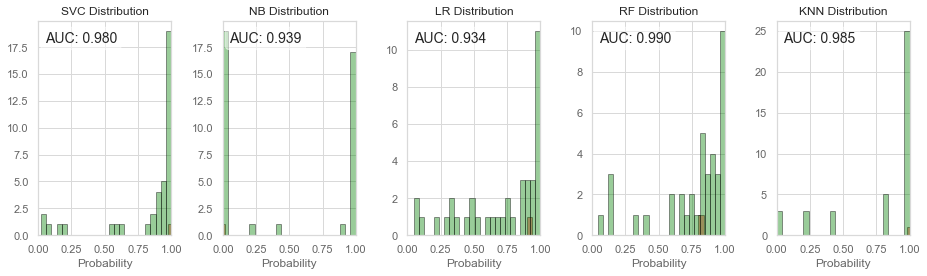

In [186]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

###### In the light of similar observations so far, it is inferable that Decision Trees perform impressively in random forest, just as it has consistently in every ensemble technique implemented so far. 

In [187]:
# Define parameter grid 
params = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}


# Initialize GridSearchCV
grid = GridSearchCV(estimator = sclf, 
                    param_grid = params, 
                    cv = 5,
                    scoring = "roc_auc",
                    verbose = 10,
                    n_jobs = -1)

# Fit GridSearchCV
grid.fit(x_train, y_train)

# Making prediction on test set
y_pred = grid.predict_proba(x_test)[:,1]

# Getting AUC
auc = metrics.roc_auc_score(y_test, y_pred)

# Print results
print(f"The AUC of the tuned Stacking classifier is {auc:.3f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.2min finished


The AUC of the tuned Stacking classifier is 0.995


###### At this point, Stacking has provided a major boost in AUC in comparison to the highest AUC score set by Random Forests. 

## TASK 9 

###### Comparing the performances of the models individually: 

Of SVM, Logistic Regression, KNN, Naive Bayes and Decision Trees, SVM has persistently topped its competitions in the recall score and progressed in the F1 score on elimination of two specific features [ Please refer to result_3 ]. 

###### Comparing model performances post bagging: 

Bagging enabled Decision Trees, of all the competing models, to achieve a radically higher score in recall[0.900 to 0.925]; especially post similar tweaks to the dataset as in the previous comparison. 

###### Comparison model performances post boosting; 

Boosting proved more powerful and effective in leveraging Decision Trees than Bagging. It was managed to launch the score from a low starting value to 0.975 in recall along with a desirable F1 score as well. [Please refer to boost_result_3]

###### Gradient Boosting: 

Gradient Boosting could not outperform Bagging in the recall score either. It equalled bagging. [Please refer to gboost_result_5a]

###### Random Forest: 

Random Forest has exactly matched Decision Trees Bagging and Gradient Boosting in the recall score. [Please refer to rf_result_3]




###### Meta classifier / stacking : 

In [189]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred)

In [190]:
tpr

array([0.        , 0.03030303, 0.96969697, 0.96969697, 1.        ,
       1.        ])

Matching the following with the above true positive rates, it is inferable that Stacking benefits higher recall the most:

"SVC", "NB", "LR", "RF", "KNN", "Stack"

##### Further, considering the superiority of Stacking's AUC over the rest, it can be asserted the Stacking favors maximum accuracy with necessarily maximum recall. 

#### Conclusively:

Stacking proves superior over other ensembles techniques and classification models for the given dataset. 